In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import theano
import scipy.stats as stats
import scipy
import seaborn as sns
sns.set(color_codes=True)

from bayesian import CLRM

In [2]:
# Set logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('bayesian_glm')

plt.style.use('fivethirtyeight')
%matplotlib inline

files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

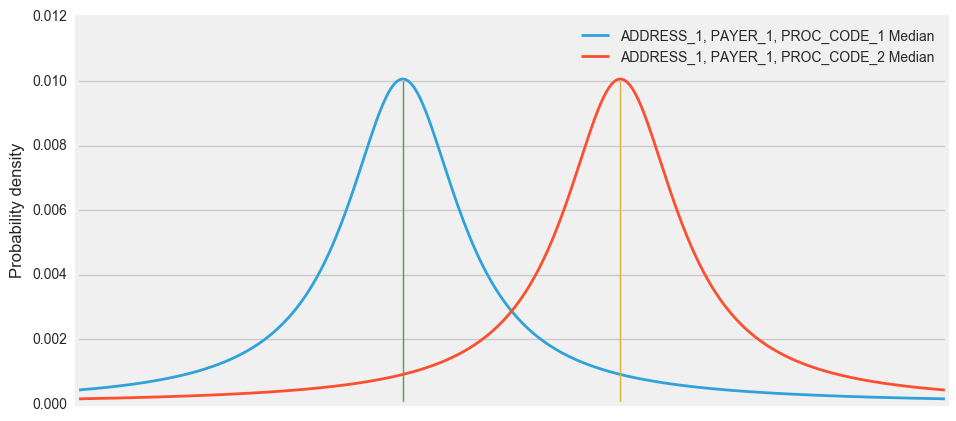

In [64]:
## Visual Example of Heavy Tails around Student T compared to Normal
small_t_dist_1 = pm.StudentT.dist(mu=450, nu=1, lam=0.001)
small_t_dist_2 = pm.StudentT.dist(mu=550, nu=1, lam=0.001)

x_eval = np.linspace(300, 700, 300)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x_eval, theano.tensor.exp(small_t_dist_1.logp(x_eval)).eval(), label='ADDRESS_1, PAYER_1, PROC_CODE_1 Median', lw=2.)
ax.plot(x_eval, theano.tensor.exp(small_t_dist_2.logp(x_eval)).eval(), label='ADDRESS_1, PAYER_1, PROC_CODE_2 Median', lw=2.)
ax.plot((550, 550), (0, 0.010), '-' , linewidth=1)
ax.plot((450, 450), (0, 0.010), '-' , linewidth=1)

ax.get_xaxis().set_ticks([])
ax.set_ylabel('Probability density')
ax.legend()

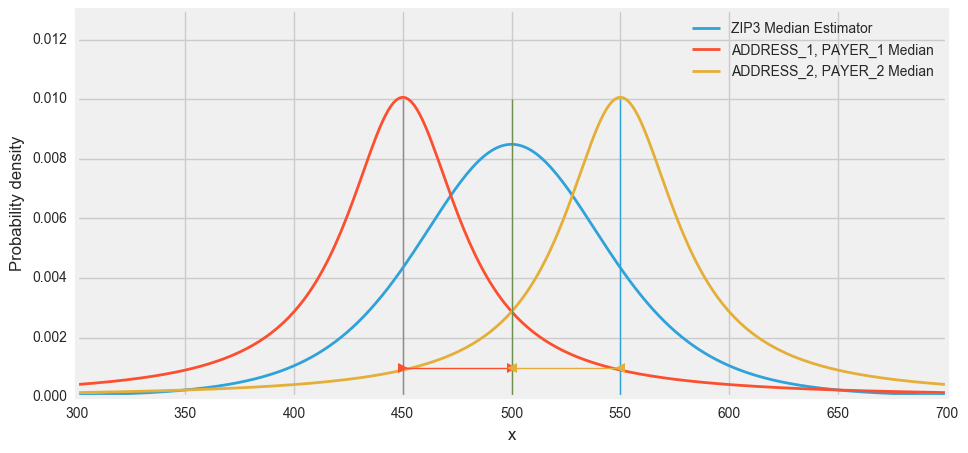

In [58]:
## Visual Example of Heavy Tails around Student T compared to Normal
large_t_dist = pm.StudentT.dist(mu=500, nu=5, lam=0.0005)
small_t_dist_1 = pm.StudentT.dist(mu=450, nu=1, lam=0.001)
small_t_dist_2 = pm.StudentT.dist(mu=550, nu=1, lam=0.001)
x_eval = np.linspace(300, 700, 300)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x_eval, theano.tensor.exp(large_t_dist.logp(x_eval)).eval(), label='ZIP3 Median Estimator', lw=2.)
ax.plot(x_eval, theano.tensor.exp(small_t_dist_1.logp(x_eval)).eval(), label='ADDRESS_1, PAYER_1 Median', lw=2.)
ax.plot(x_eval, theano.tensor.exp(small_t_dist_2.logp(x_eval)).eval(), label='ADDRESS_2, PAYER_2 Median', lw=2.)
ax.plot((500, 500), (0, 0.010), '-' , linewidth=1)
ax.plot((450, 450), (0, 0.010), '-' , linewidth=1)
ax.plot((550, 550), (0, 0.010), '-' , linewidth=1)
ax.plot((450, 500), (0.001, 0.001), '->' , linewidth=1)
ax.plot((500, 550), (0.001, 0.001), '<-' , linewidth=1)

ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_ylim(0, 0.013)
ax.legend()

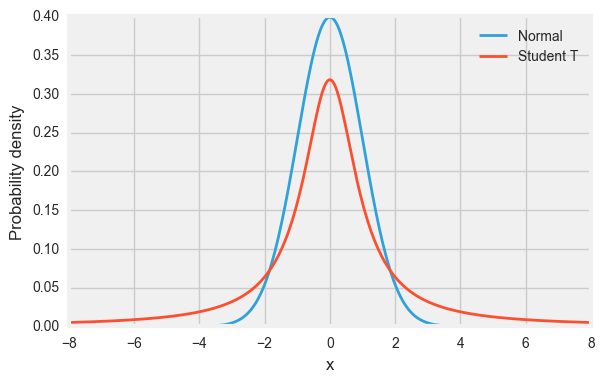

In [7]:
## Visual Example of Heavy Tails around Student T compared to Normal
normal_dist = pm.Normal.dist(mu=0, sd=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();

In [7]:
files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]
data = [CLRM.xy_op(file_name) for file_name in files]

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)


In [23]:
hr_model = []
m = CLRM.hierarchical_model()
# Inference button (TM)!
with m as model:
    # Use ADVI for initialization
    mu, sds, elbo = pm.variational.advi(n=100000)
    step = pm.NUTS(scaling=model.dict_to_array(sds)**2, is_cov=True)
    trace = pm.sample(5000, step, start=mu)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
Average ELBO = -1,184.4: 100%|██████████| 100000/100000 [00:23<00:00, 4241.67it/s]
Finished [100%]: Average ELBO = -1,184.4
INFO:pymc3:Finished [100%]: Average ELBO = -1,184.4
100%|██████████| 5000/5000 [01:02<00:00, 79.86it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c161da10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1d20390>]], dtype=object)

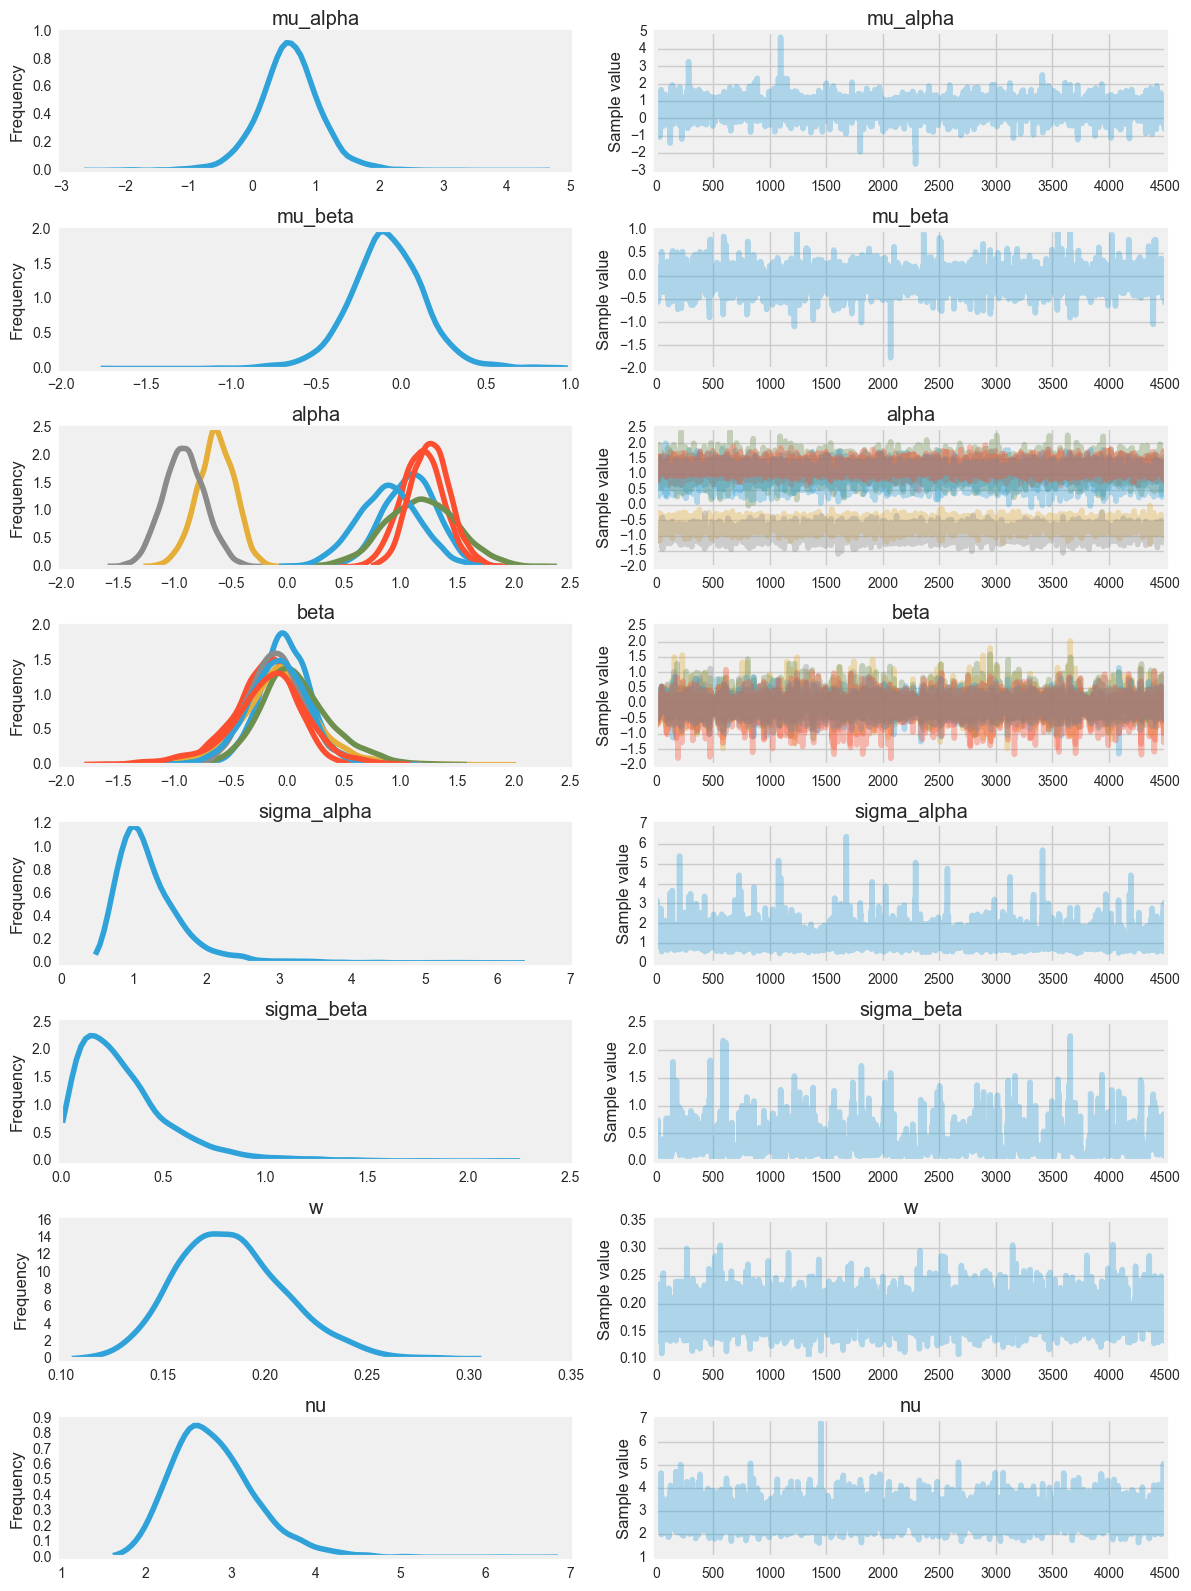

In [24]:
pm.traceplot(trace[500:])

In [29]:
results = []

def run(input_files):
    m = CLRM.hierarchical_model(input_files)
    trace = CLRM.mcmc(m)
    return Result(input_files, m, trace)

if True:
    results.append(run(files[:2]))
    results.append(run(files[2:]))

INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
Average ELBO = -531.92: 100%|██████████| 100000/100000 [00:19<00:00, 5139.51it/s]
Finished [100%]: Average ELBO = -531.83
INFO:pymc3:Finished [100%]: Average ELBO = -531.83
100%|██████████| 5000/5000 [00:55<00:00, 89.40it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1be3d9bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c245ce90>]], dtype=object)

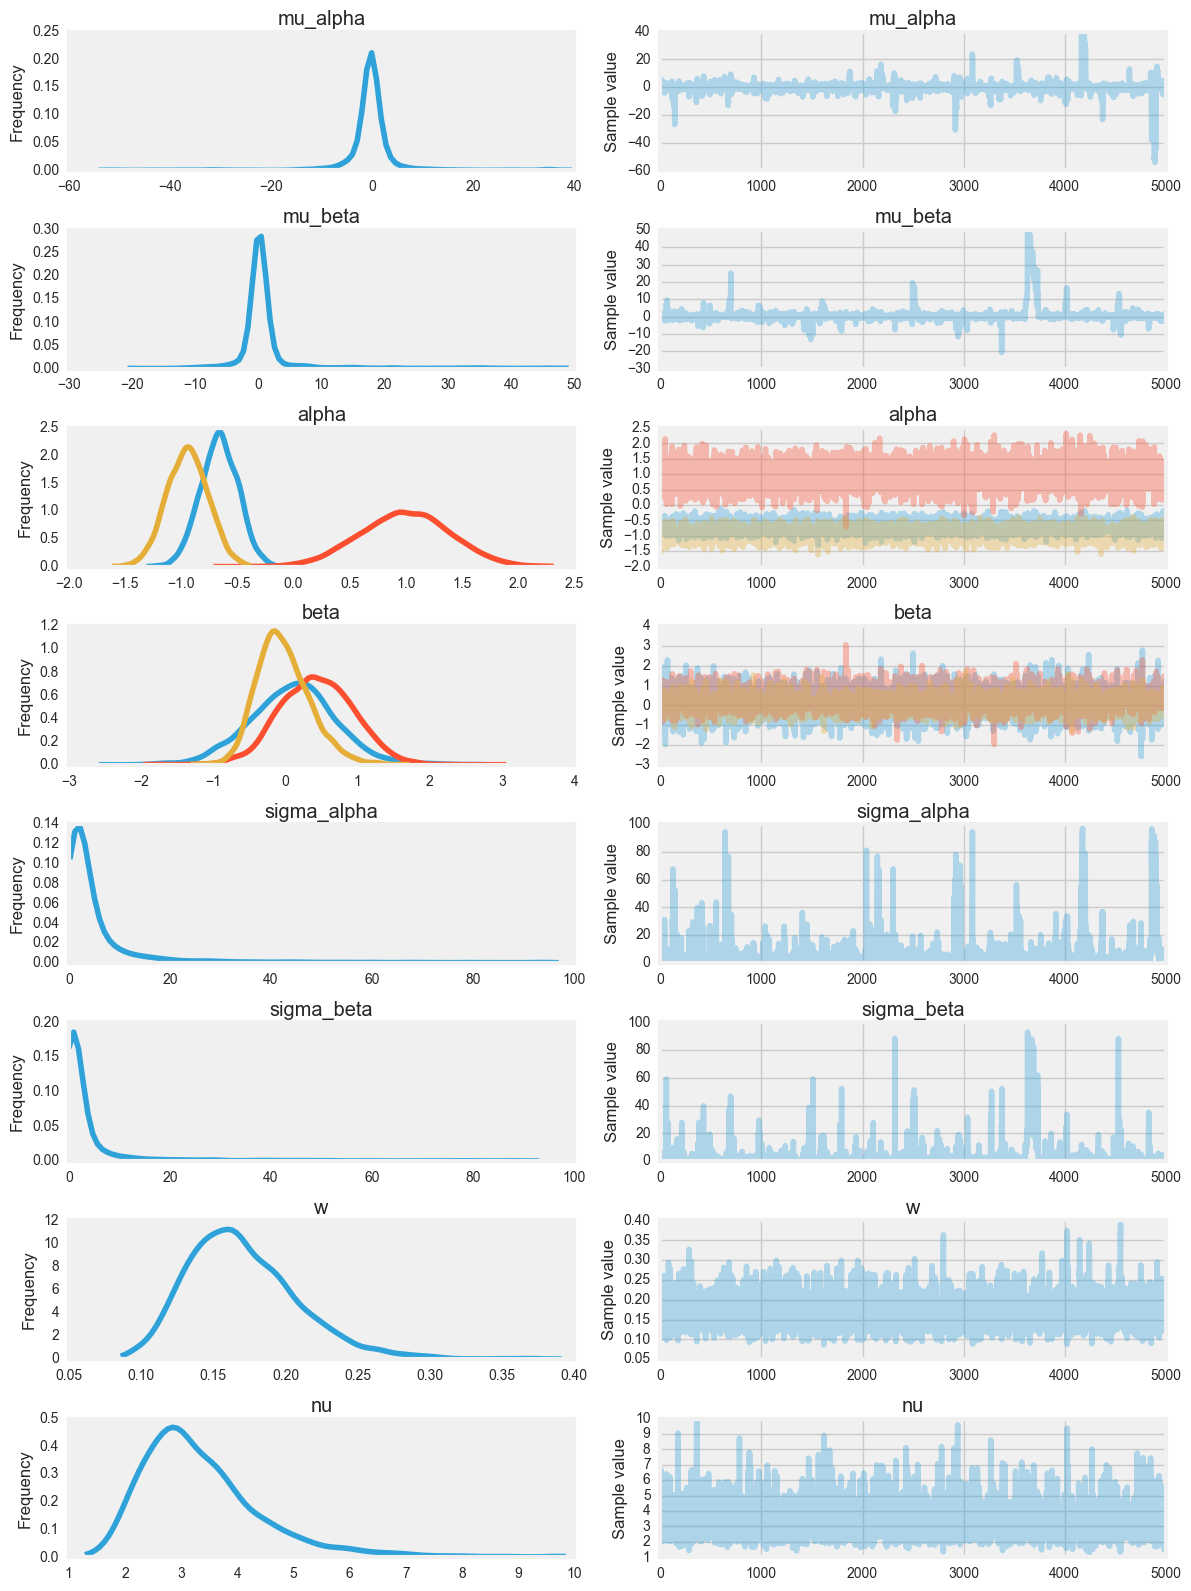

In [35]:
pm.traceplot(trace_1[0][1])
pm.summary(trace_1[0][1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116807810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c5f78310>]], dtype=object)

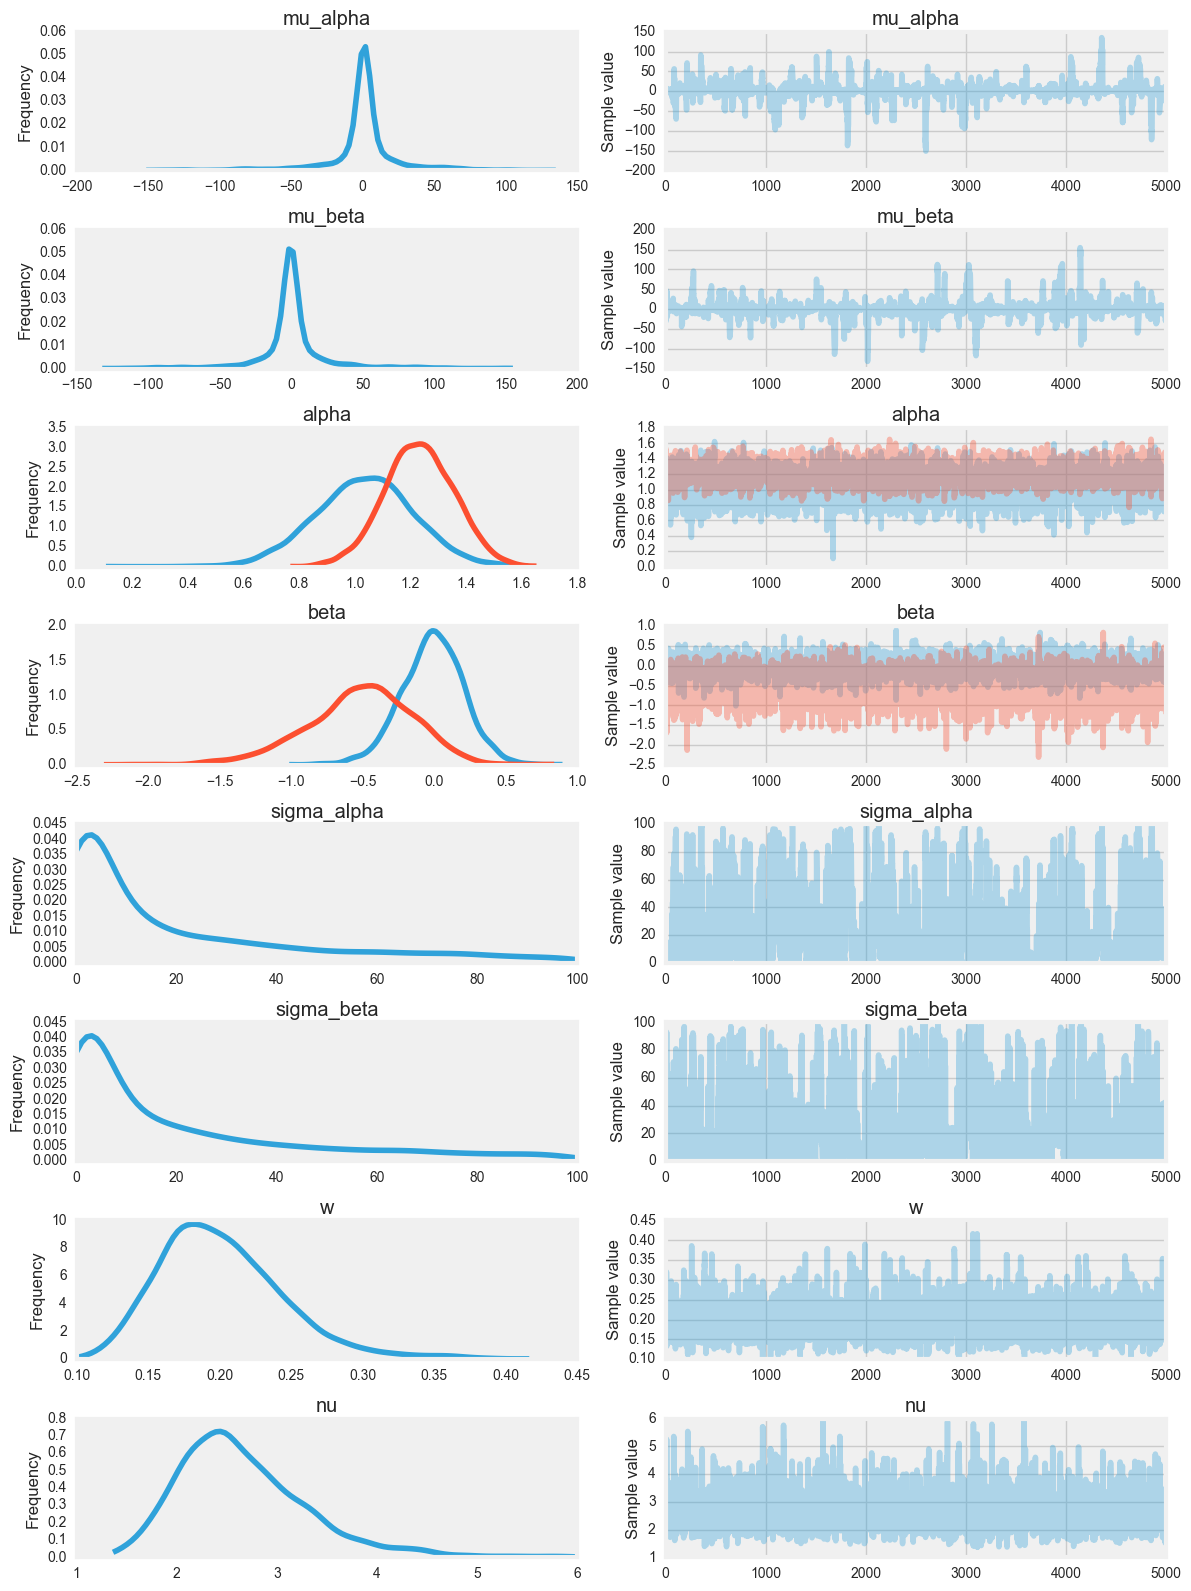

In [36]:
pm.traceplot(trace_2[0][1])
pm.summary(trace_2[0][1])

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
Average ELBO = -680.25: 100%|██████████| 100000/100000 [00:22<00:00, 4463.44it/s]
Finished [100%]: Average ELBO = -679.96
INFO:pymc3:Finished [100%]: Average ELBO = -679.96
100%|██████████| 5000/5000 [03:11<00:00, 26.10it/s]


INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -288.36: 100%|██████████| 200000/200000 [00:26<00:00, 7429.46it/s]
Finished [100%]: Average ELBO = -288.37
INFO:pymc3:Finished [100%]: Average ELBO = -288.37
100%|██████████| 10000/10000 [02:05<00:00, 79.41it/s]


Results and Diagnostics for data_1_1.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.006            0.206            0.002            [-0.405, 0.410]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.423         -0.128         0.012          0.148          0.396


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.031            0.162            0.001            [0.715, 1.350]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.702          0.924          1.035          1.139          1.342


w:

  Mean             SD               MC Error         95% HPD interv

INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -382.14: 100%|██████████| 200000/200000 [00:26<00:00, 7614.45it/s]
Finished [100%]: Average ELBO = -382.13
INFO:pymc3:Finished [100%]: Average ELBO = -382.13
100%|██████████| 10000/10000 [02:05<00:00, 79.50it/s]


Results and Diagnostics for data_1_2.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.562           0.446            0.005            [-1.486, 0.262]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.523         -0.841         -0.535         -0.259         0.235


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.262            0.138            0.001            [0.996, 1.536]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.997          1.168          1.263          1.352          1.539


w:

  Mean             SD               MC Error         95% HPD interv

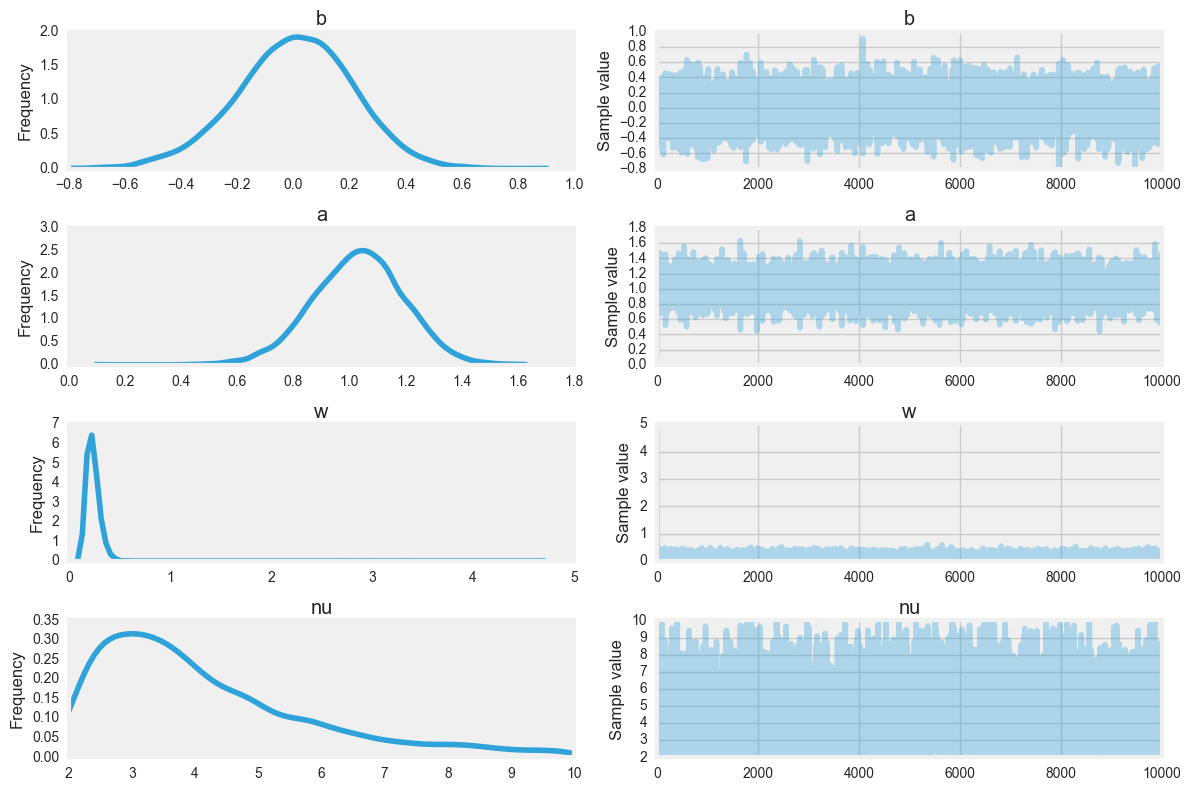

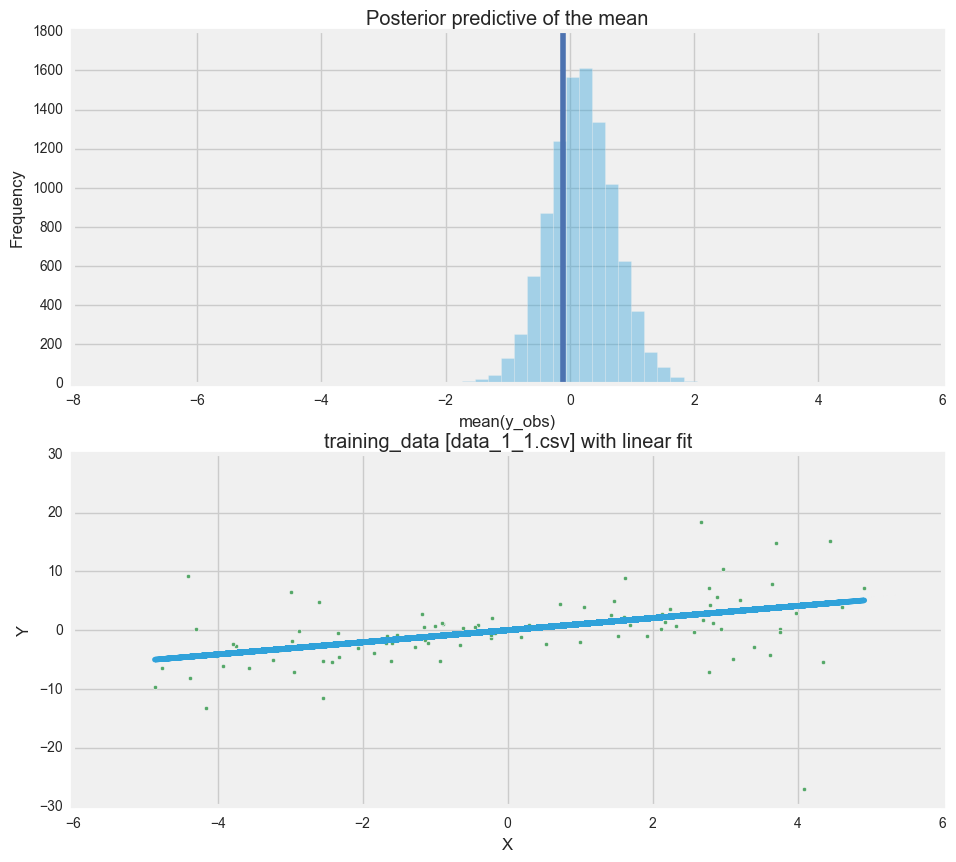

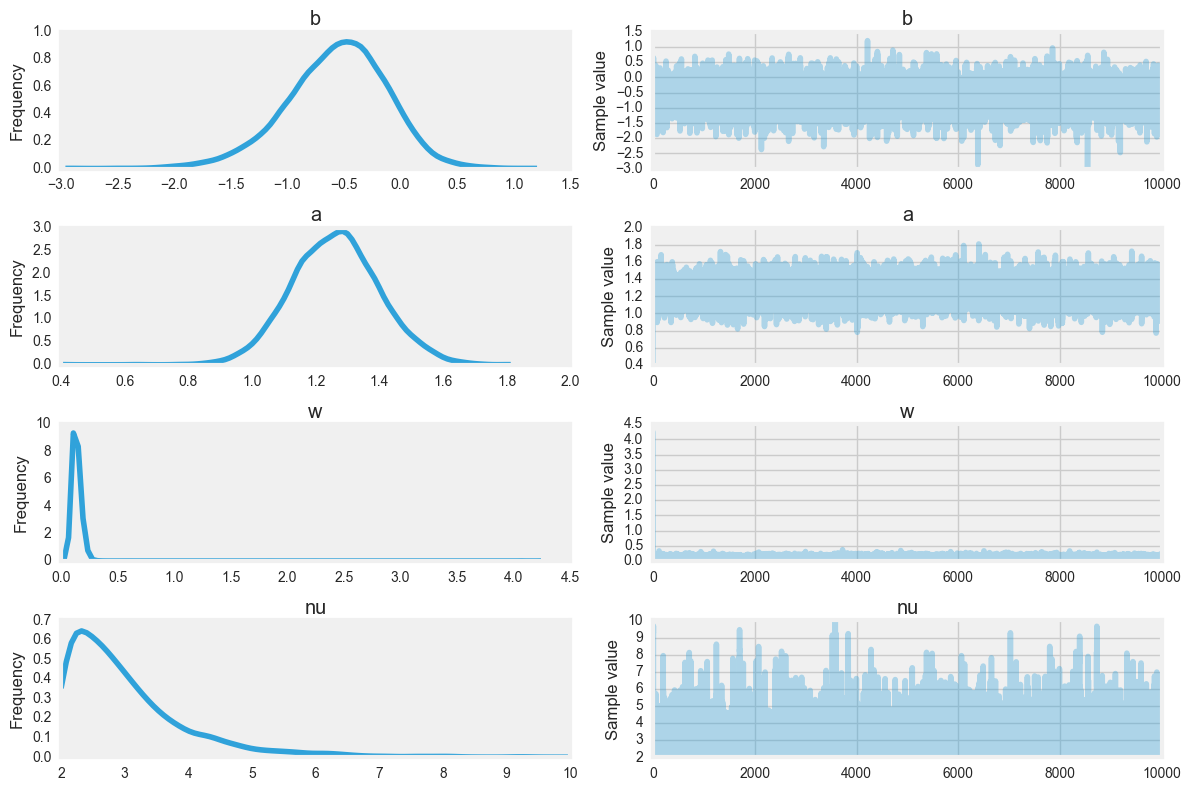

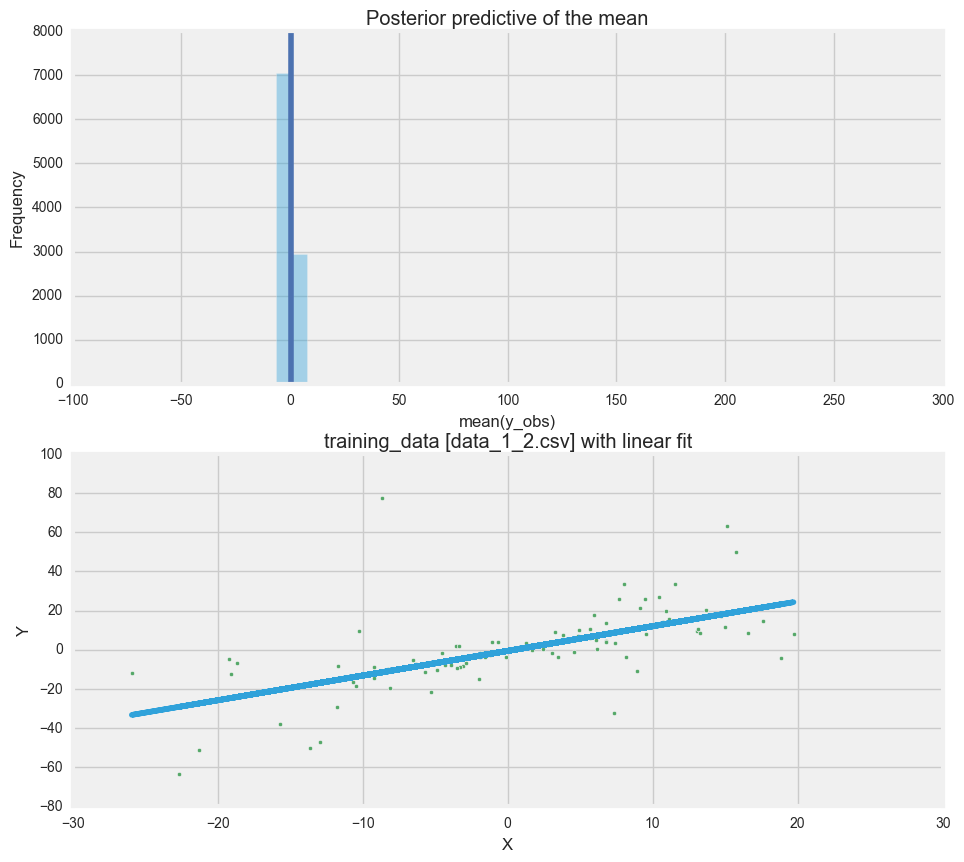

In [5]:
h_model_2 = []
for file_name in files[:1]:
    x, y = CLRM.xy_op(file_name, None)
    m = CLRM.model(x, y)
    trace = CLRM.mcmc(m, 10000)
    ppc = pm.sampling.sample_ppc(trace, model=m.model)
    nuts_model.append(CLRM(file_name, x, y, m, trace, ppc))
    CLRM.result_and_diagnostics(file_name, x, y, m, trace, ppc)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -338.67: 100%|██████████| 200000/200000 [00:26<00:00, 7469.37it/s]
Finished [100%]: Average ELBO = -338.68
INFO:pymc3:Finished [100%]: Average ELBO = -338.68
100%|██████████| 10000/10000 [02:23<00:00, 69.67it/s]


Results and Diagnostics for data_1_1.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.773           2.838            0.107            [-1.294, -0.540]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.302         -0.997         -0.870         -0.744         -0.545


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.229            1.932            0.128            [0.880, 1.325]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.878          1.031          1.104          1.175          1.324


lam:

  Mean             SD               MC Error         95% HPD in

INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -446.44: 100%|██████████| 200000/200000 [00:26<00:00, 7551.94it/s]
Finished [100%]: Average ELBO = -445.57
INFO:pymc3:Finished [100%]: Average ELBO = -445.57
100%|██████████| 10000/10000 [14:45<00:00, 65.05it/s]


Results and Diagnostics for data_1_2.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -4.271           1.072            0.045            [-6.301, -2.085]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -6.039         -4.957         -4.367         -3.742         -1.475


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.166            0.057            0.002            [0.045, 0.275]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.020          0.135          0.171          0.203          0.263


lam:

  Mean             SD               MC Error         95% HPD in

INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -227.73: 100%|██████████| 200000/200000 [00:28<00:00, 7039.53it/s]
Finished [100%]: Average ELBO = -227.9
INFO:pymc3:Finished [100%]: Average ELBO = -227.9
100%|██████████| 10000/10000 [02:19<00:00, 71.52it/s]


Results and Diagnostics for data_1_3.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -9.276           0.000            0.000            [-9.276, -9.276]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -9.276         -9.276         -9.276         -9.276         -9.276


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -1.332           0.000            0.000            [-1.332, -1.332]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.332         -1.332         -1.332         -1.332         -1.332


lam:

  Mean             SD               MC Error         95% HPD

INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -163.79: 100%|██████████| 200000/200000 [00:28<00:00, 7049.98it/s]
Finished [100%]: Average ELBO = -163.48
INFO:pymc3:Finished [100%]: Average ELBO = -163.48
100%|██████████| 10000/10000 [02:16<00:00, 73.27it/s]


Results and Diagnostics for data_1_4.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.042            3.960            0.324            [0.542, 2.922]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.596          1.272          1.706          2.150          3.016


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.178           2.031            0.107            [-0.485, -0.081]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.501         -0.355         -0.281         -0.209         -0.093


lam:

  Mean             SD               MC Error         95% HPD in

INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using advi...
INFO:pymc3:Initializing NUTS using advi...
Average ELBO = -201.21: 100%|██████████| 200000/200000 [00:31<00:00, 6304.70it/s]
Finished [100%]: Average ELBO = -201.23
INFO:pymc3:Finished [100%]: Average ELBO = -201.23
100%|██████████| 10000/10000 [03:31<00:00, 47.22it/s]


Results and Diagnostics for data_1_5.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.198            4.313            0.393            [0.276, 3.381]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.427          1.210          1.749          2.354          3.764


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.125            0.116            0.009            [0.017, 0.214]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.027          0.078          0.112          0.151          0.239


lam:

  Mean             SD               MC Error         95% HPD inter

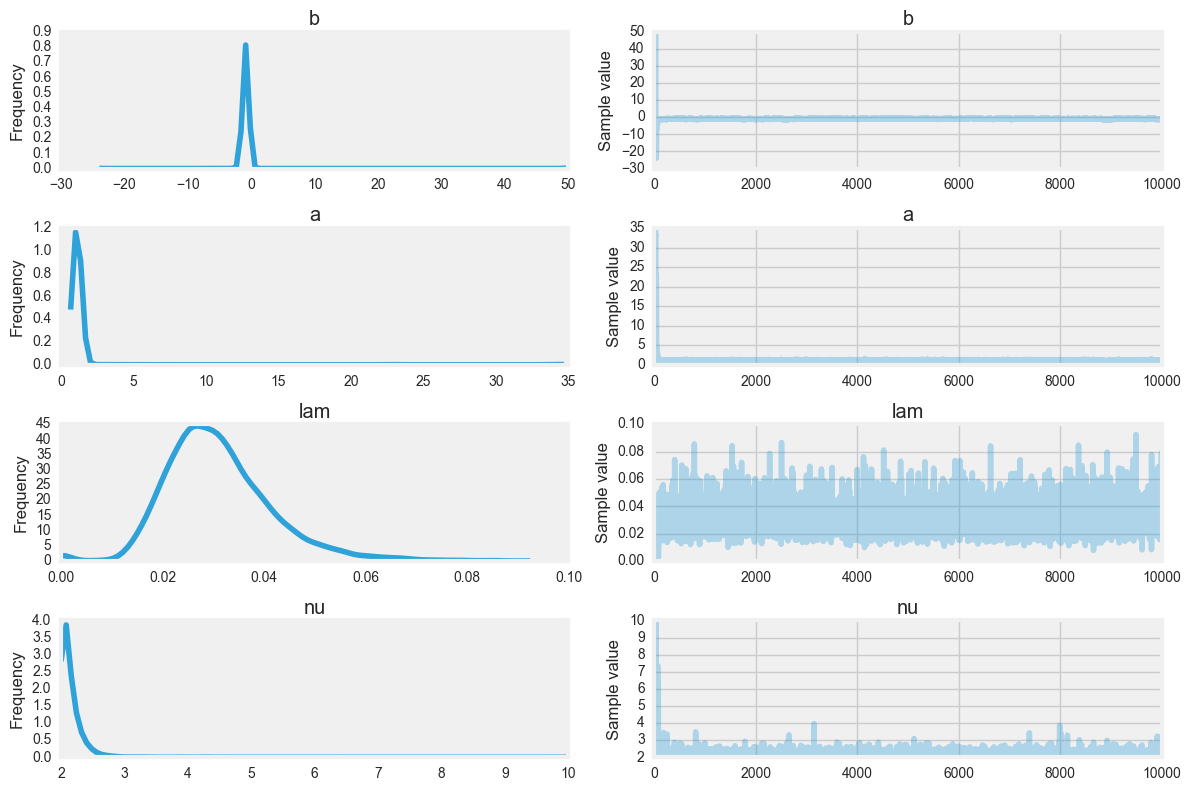

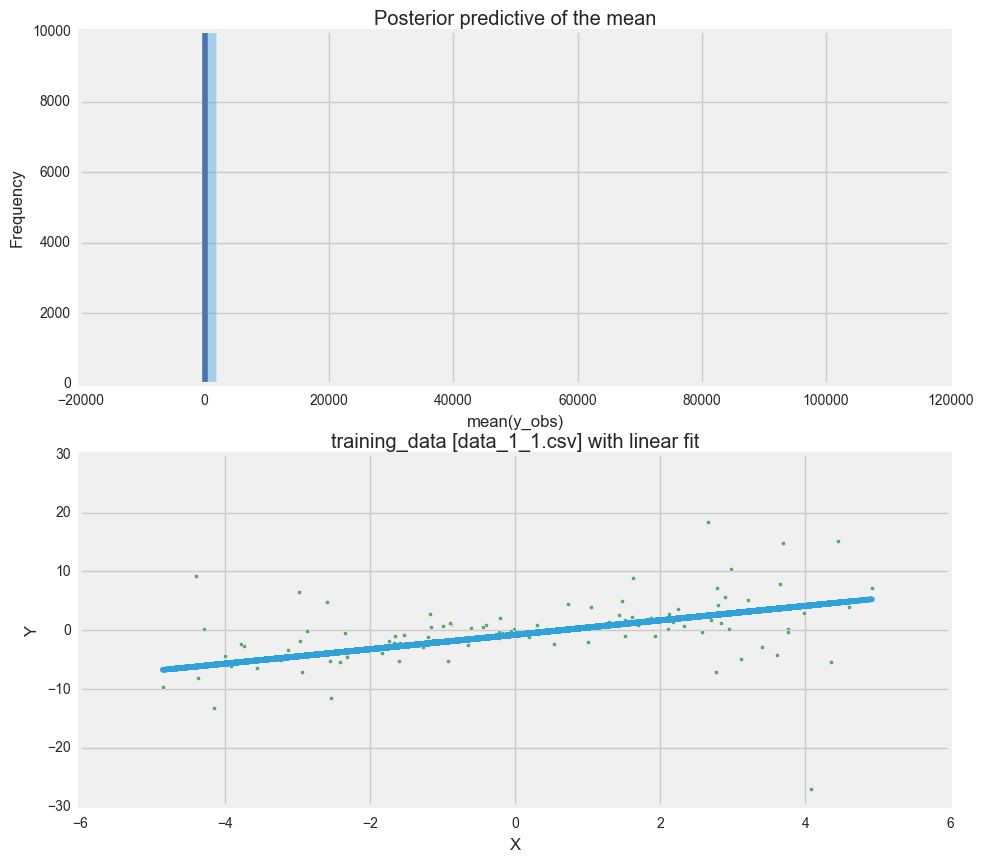

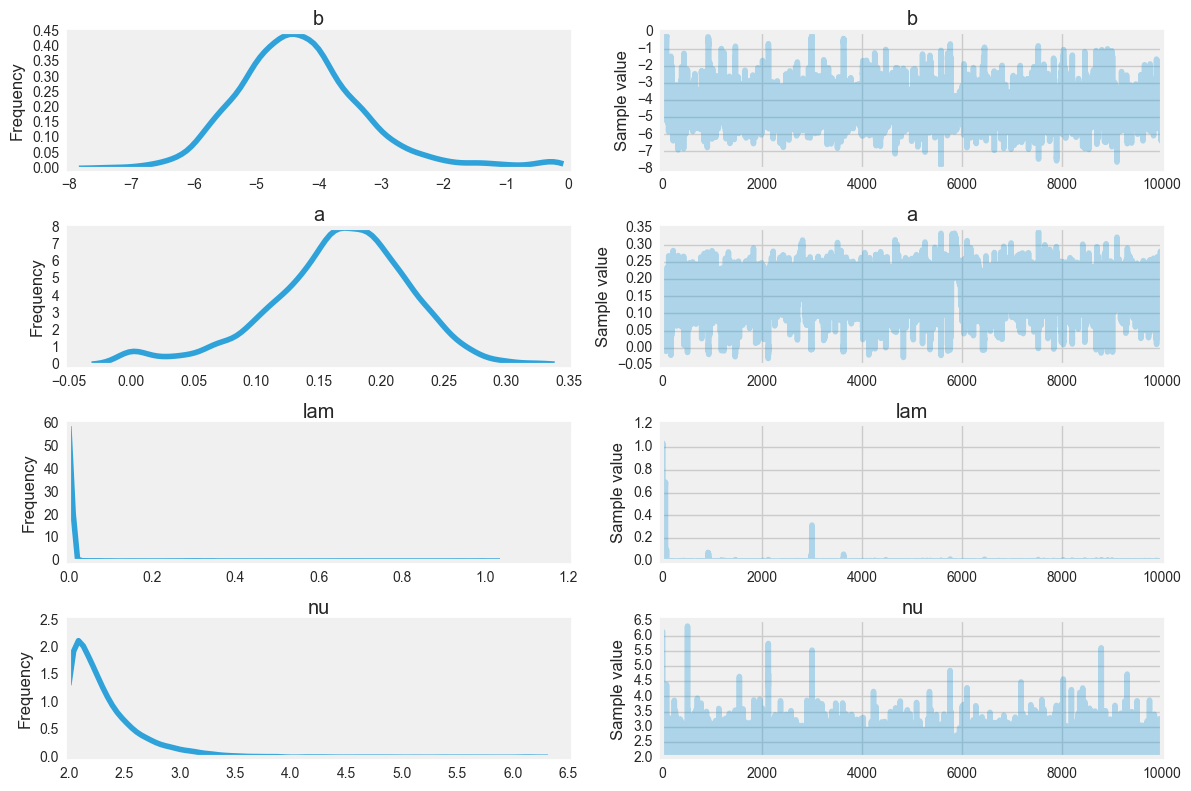

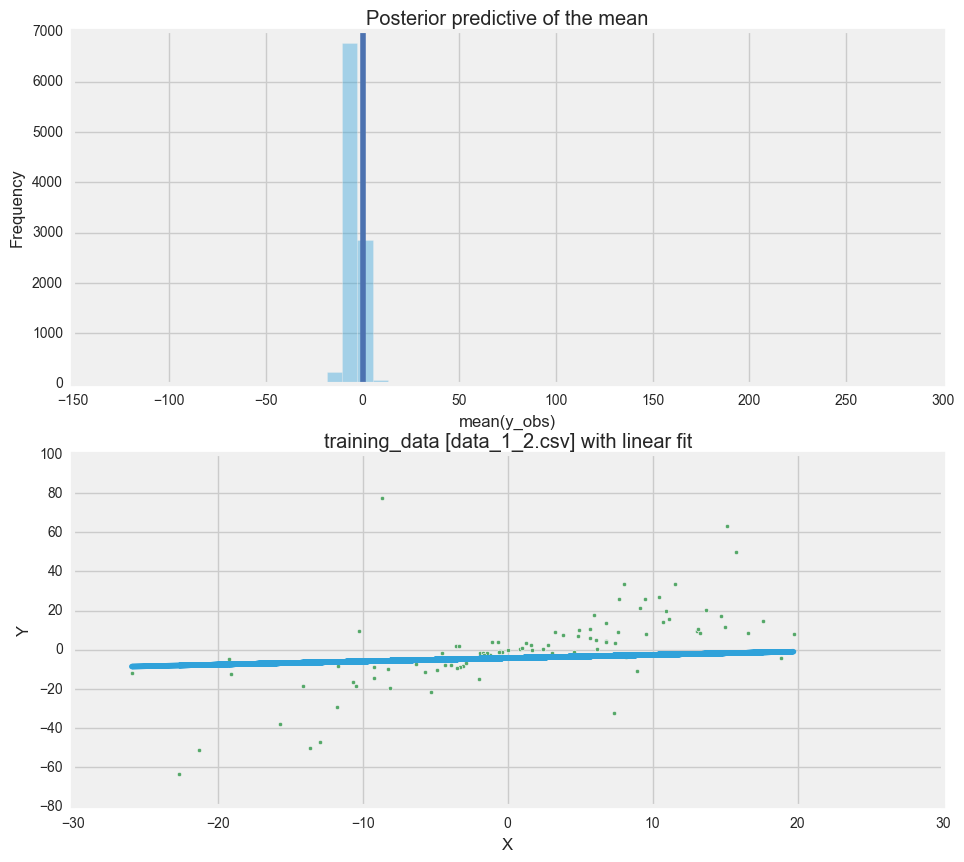

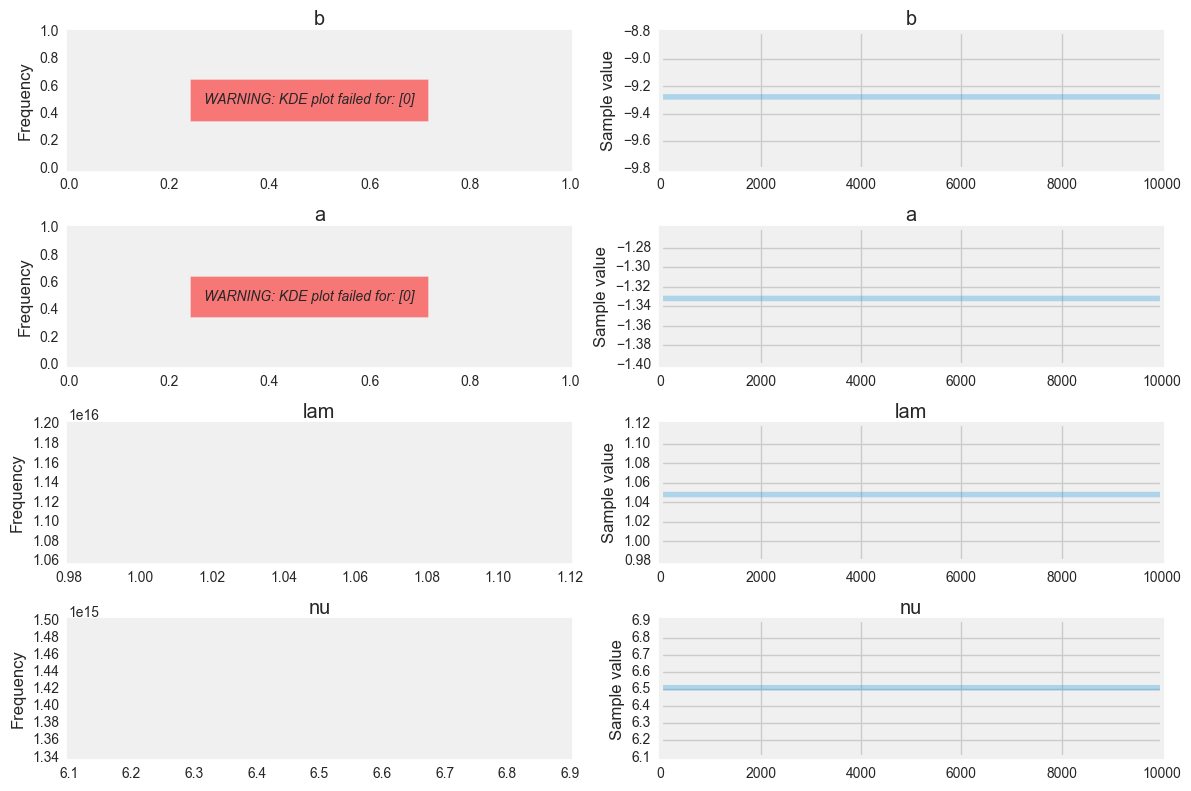

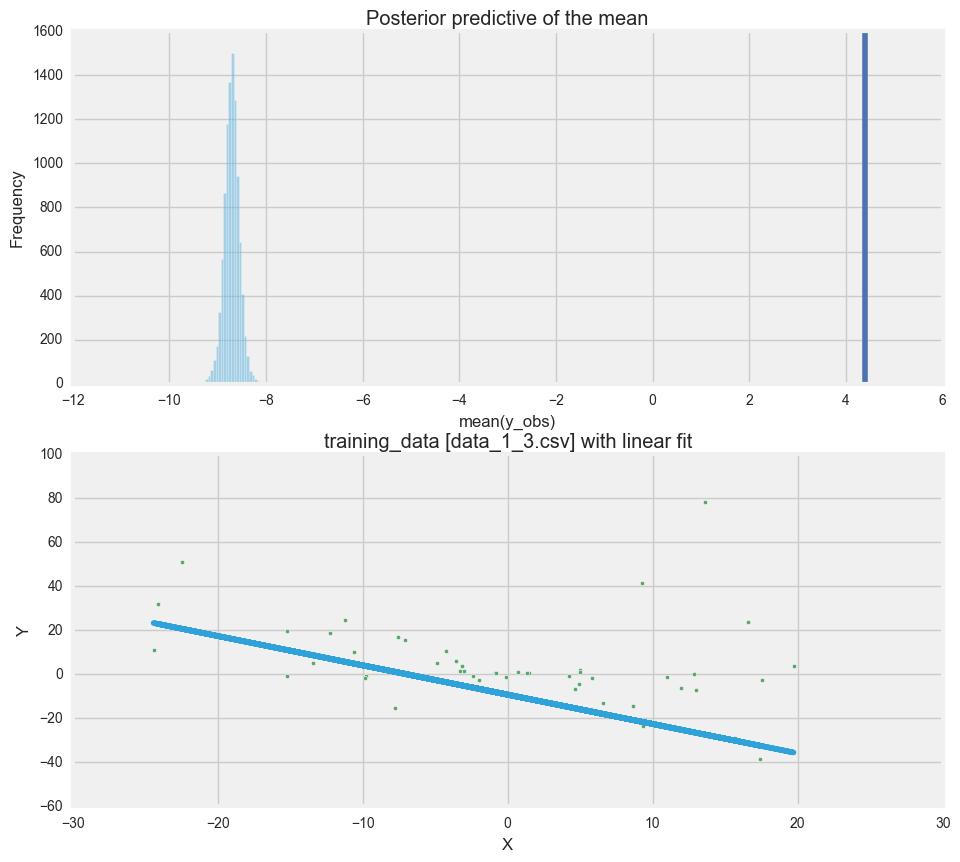

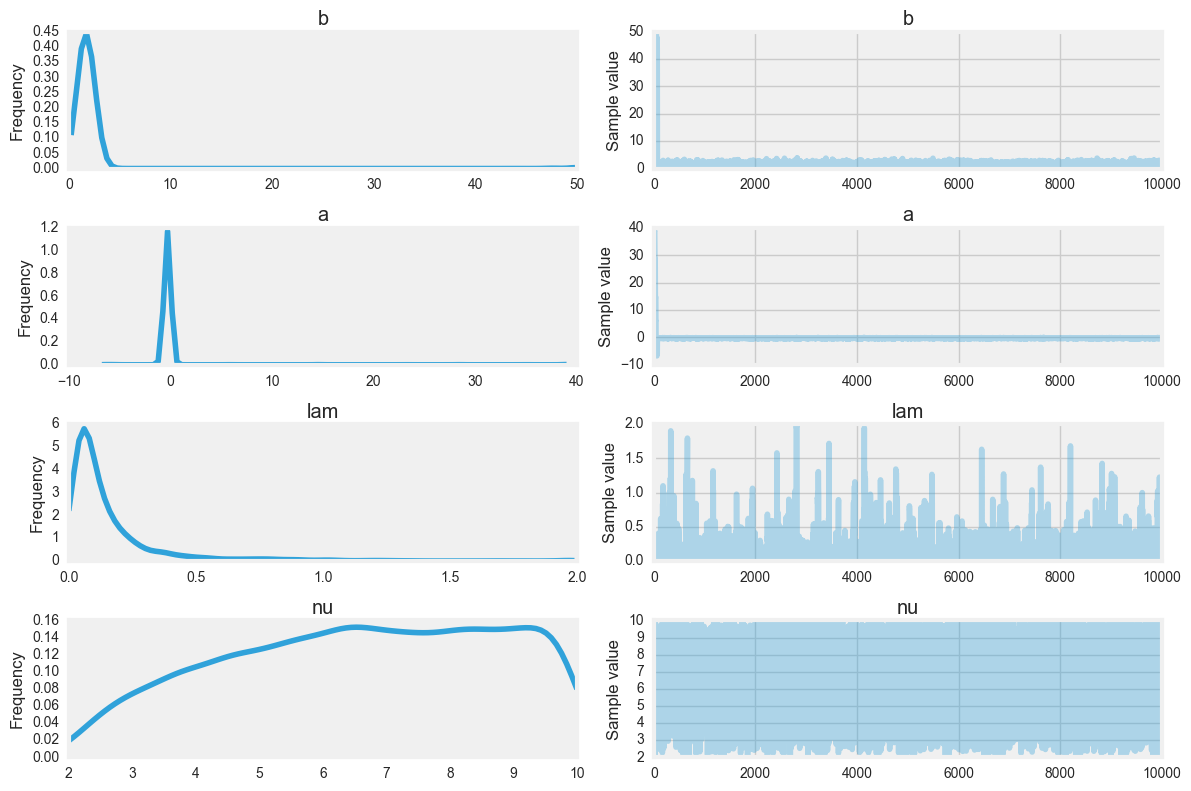

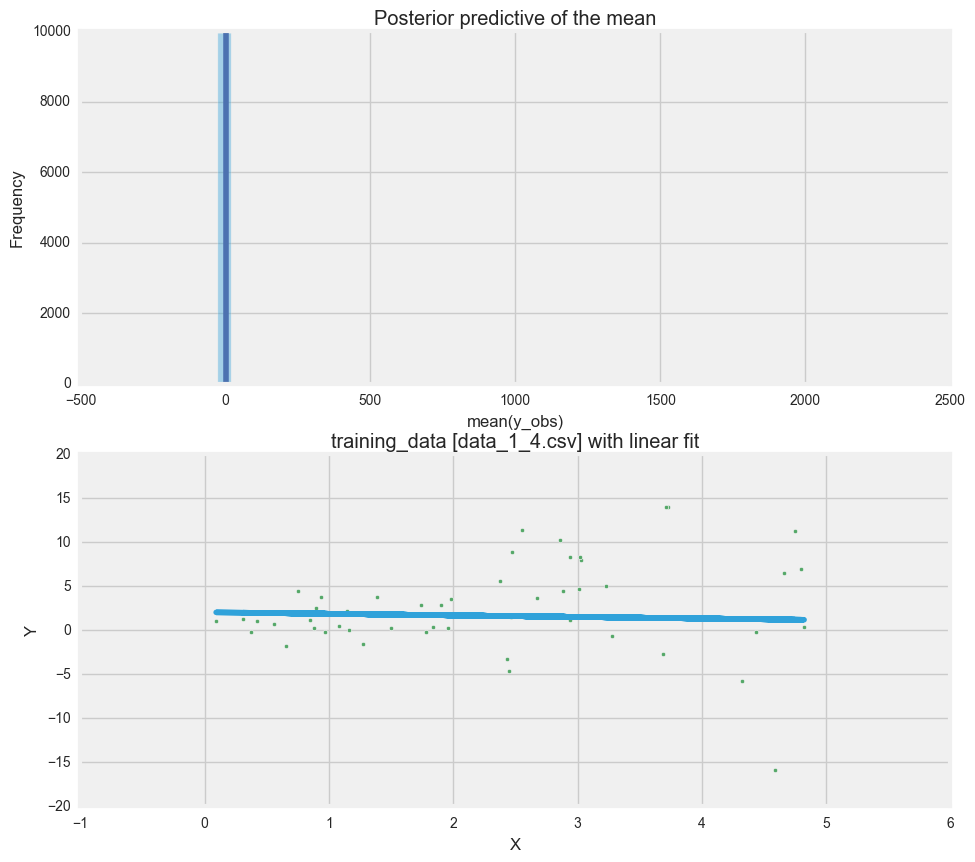

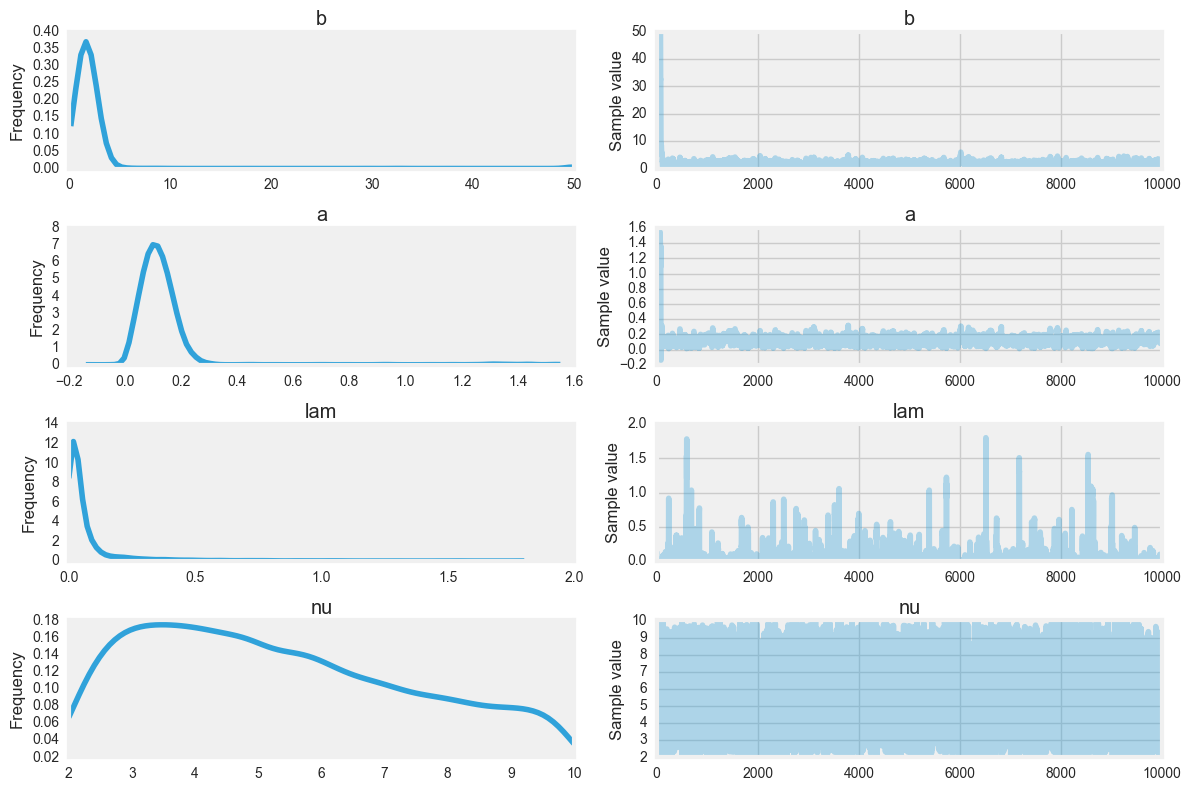

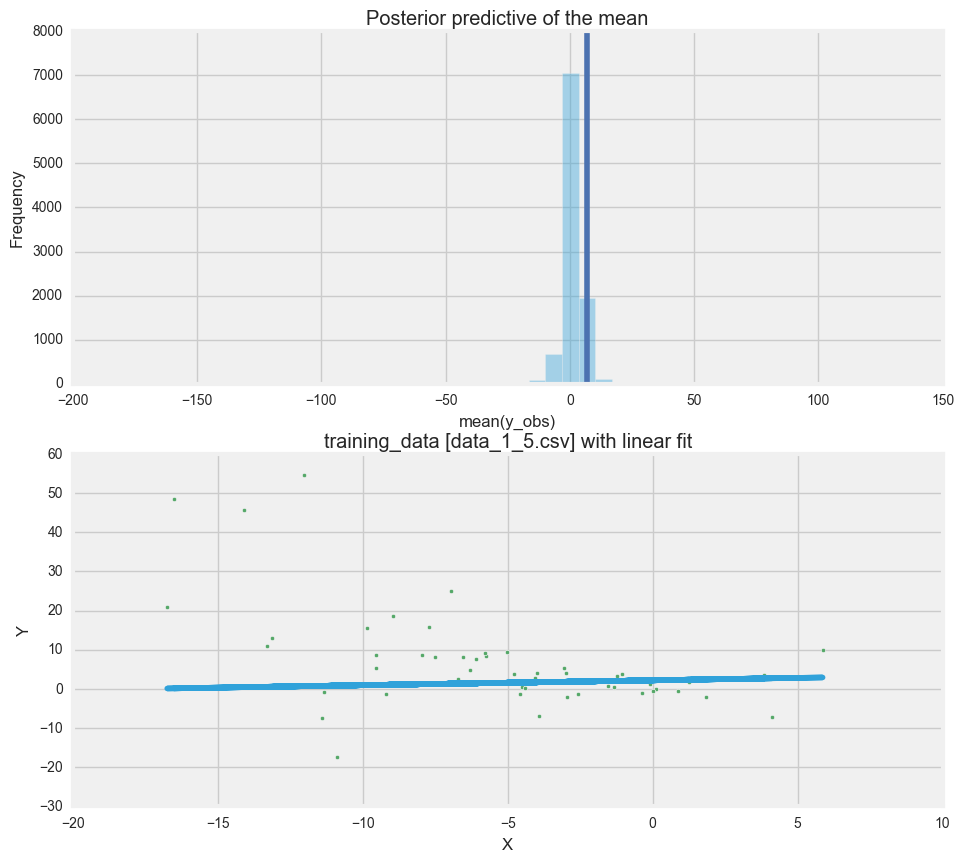

In [5]:
nl_model = []
for file_name in files:
    x, y = CLRM.xy_op(file_name, None)
    m = CLRM.model(x, y)
    trace = CLRM.mcmc(m, 10000)
    ppc = pm.sampling.sample_ppc(trace, model=m.model)
    nl_model.append(CLRM(file_name, x, y, m, trace, ppc))
    CLRM.result_and_diagnostics(file_name, x, y, m, trace, ppc)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:Starting values = {'nu_interval_': array(-4.550460085483717), 'a_interval_': array(0.21478849589071225), 'b_interval_': array(-0.052616077447989004)}


Optimization terminated successfully.
         Current function value: 303.130932
         Iterations: 4
         Function evaluations: 161


100%|██████████| 10000/10000 [01:17<00:00, 128.33it/s]


Results and Diagnostics for data_1_1.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.261           0.207            0.005            [-0.659, 0.163]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.693         -0.394         -0.260         -0.122         0.148


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.088            0.102            0.003            [0.898, 1.294]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.896          1.019          1.088          1.155          1.294


nu:

  Mean             SD               MC Error         95% HPD inter

INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of [X] is (100,)
INFO:CLRM:shape of [Y] is (100,)
INFO:CLRM:Starting values = {'nu_interval_': array(-7.121264090173817), 'a_interval_': array(0.17574405605145846), 'b_interval_': array(-0.19006715101672933)}


Optimization terminated successfully.
         Current function value: 439.003212
         Iterations: 3
         Function evaluations: 129


100%|██████████| 10000/10000 [01:19<00:00, 111.98it/s]


Results and Diagnostics for data_1_2.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.985           0.290            0.008            [-1.529, -0.399]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.527         -1.203         -0.996         -0.791         -0.394


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.893            0.059            0.002            [0.798, 0.987]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.806          0.862          0.887          0.915          1.013


nu:

  Mean             SD               MC Error         95% HPD int

INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:Starting values = {'nu_interval_': array(-5.555165441280701), 'a_interval_': array(-0.08354269763278535), 'b_interval_': array(0.1325221693003254)}


Optimization terminated successfully.
         Current function value: 230.117608
         Iterations: 3
         Function evaluations: 131


100%|██████████| 10000/10000 [01:13<00:00, 135.95it/s]


Results and Diagnostics for data_1_3.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.714            0.378            0.010            [-0.001, 1.498]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.020         0.473          0.714          0.942          1.486


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.407           0.099            0.002            [-0.623, -0.209]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.612         -0.457         -0.408         -0.356         -0.195


nu:

  Mean             SD               MC Error         95% HPD in

INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:Starting values = {'nu_interval_': array(-4.6835777715047335), 'a_interval_': array(0.2874112977348709), 'b_interval_': array(0.012151297274771815)}


Optimization terminated successfully.
         Current function value: 162.452955
         Iterations: 2
         Function evaluations: 82


100%|██████████| 10000/10000 [01:16<00:00, 130.53it/s]


Results and Diagnostics for data_1_4.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.034           0.455            0.022            [-0.944, 0.839]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.004         -0.338         -0.018         0.277          0.791


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.466            0.185            0.009            [1.143, 1.840]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.132          1.340          1.467          1.583          1.836


nu:

  Mean             SD               MC Error         95% HPD inter

INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of [X] is (50,)
INFO:CLRM:shape of [Y] is (50,)
INFO:CLRM:Starting values = {'nu_interval_': array(-5.561173284422208), 'a_interval_': array(-0.19737955621676978), 'b_interval_': array(-0.0010701778126501705)}


Optimization terminated successfully.
         Current function value: 196.717059
         Iterations: 2
         Function evaluations: 88


100%|██████████| 10000/10000 [01:15<00:00, 132.15it/s]


Results and Diagnostics for data_1_5.csv

b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.017           0.432            0.012            [-0.843, 0.877]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.836         -0.297         -0.029         0.249          0.897


a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -1.000           0.091            0.003            [-1.184, -0.812]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -1.202         -1.054         -0.997         -0.945         -0.818


nu:

  Mean             SD               MC Error         95% HPD in

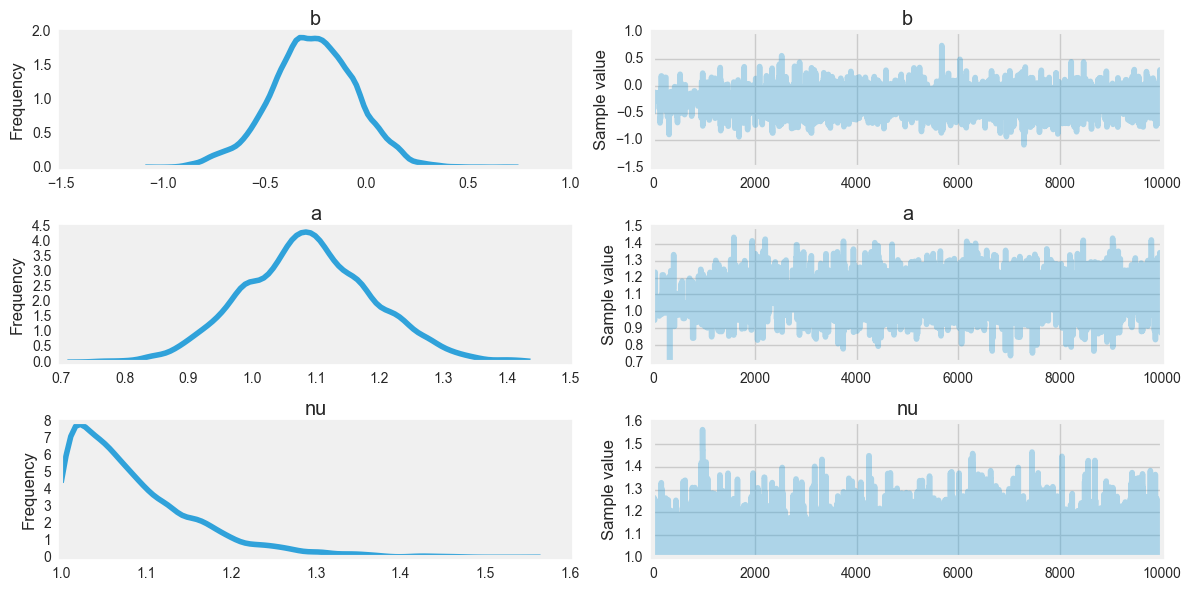

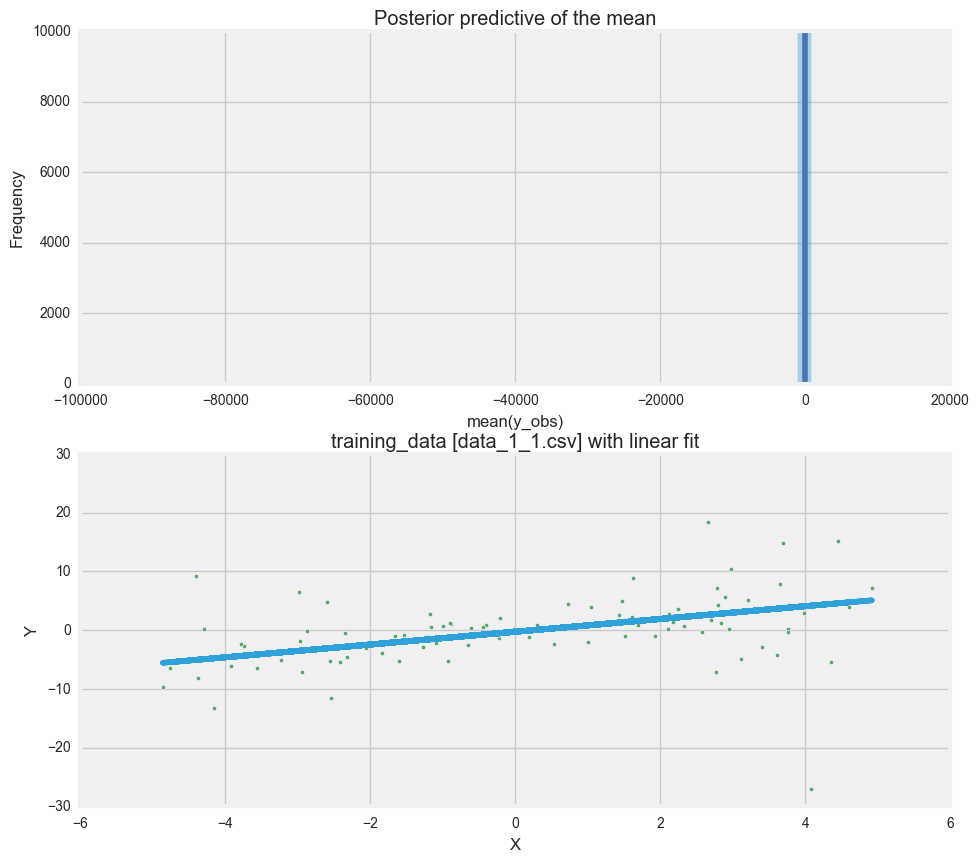

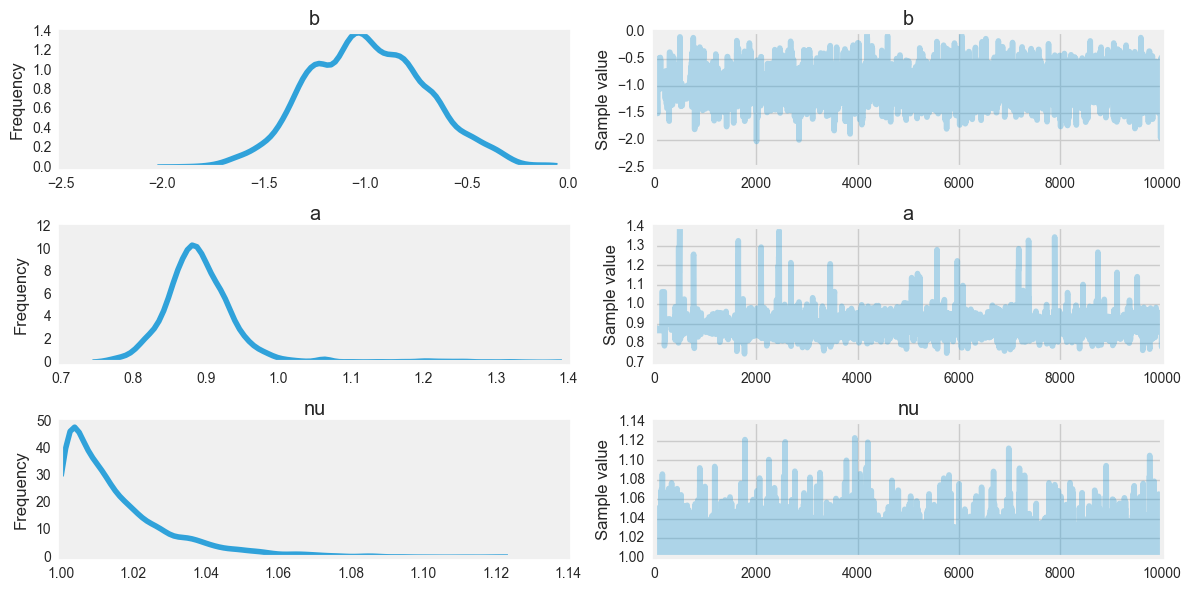

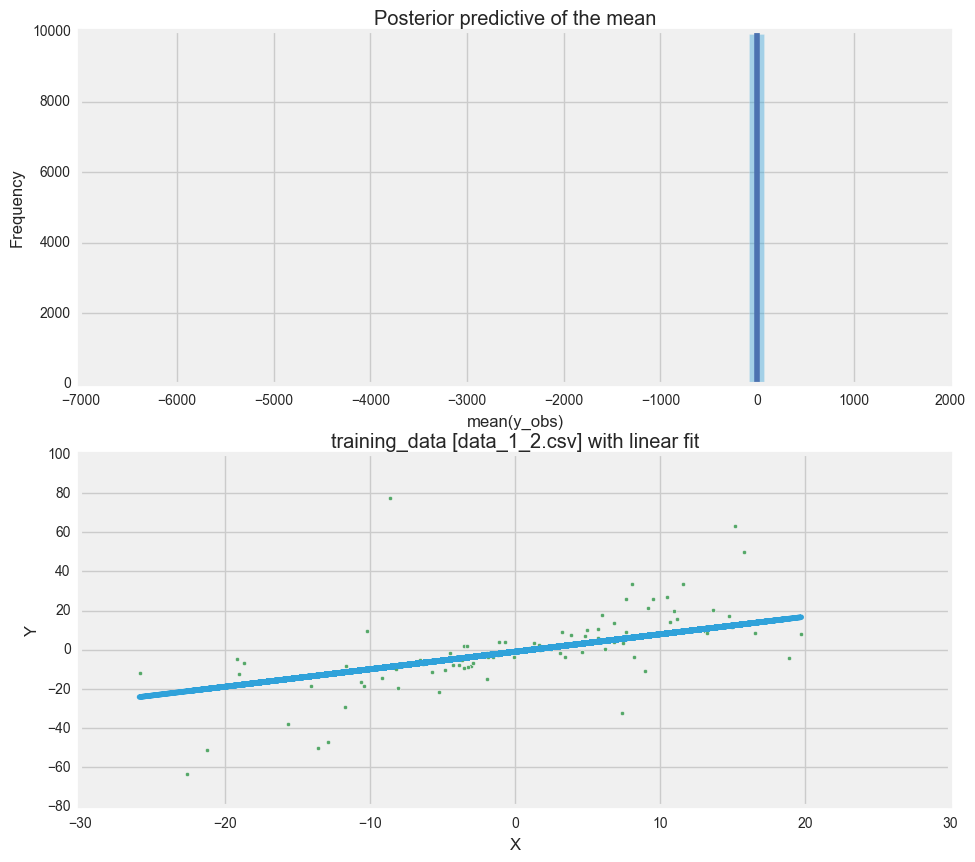

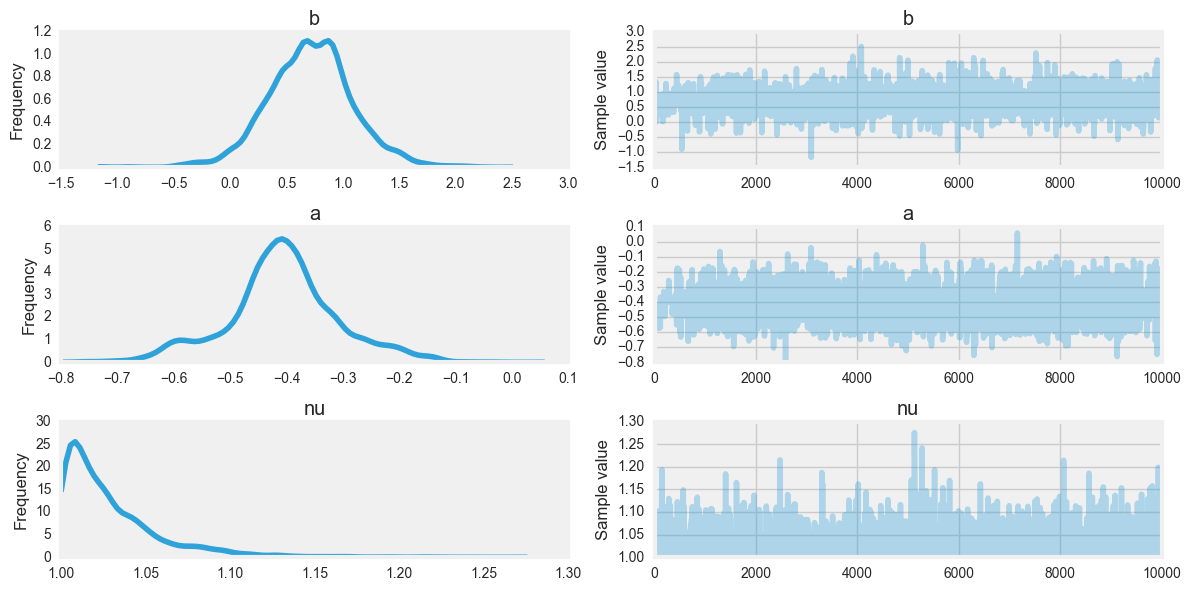

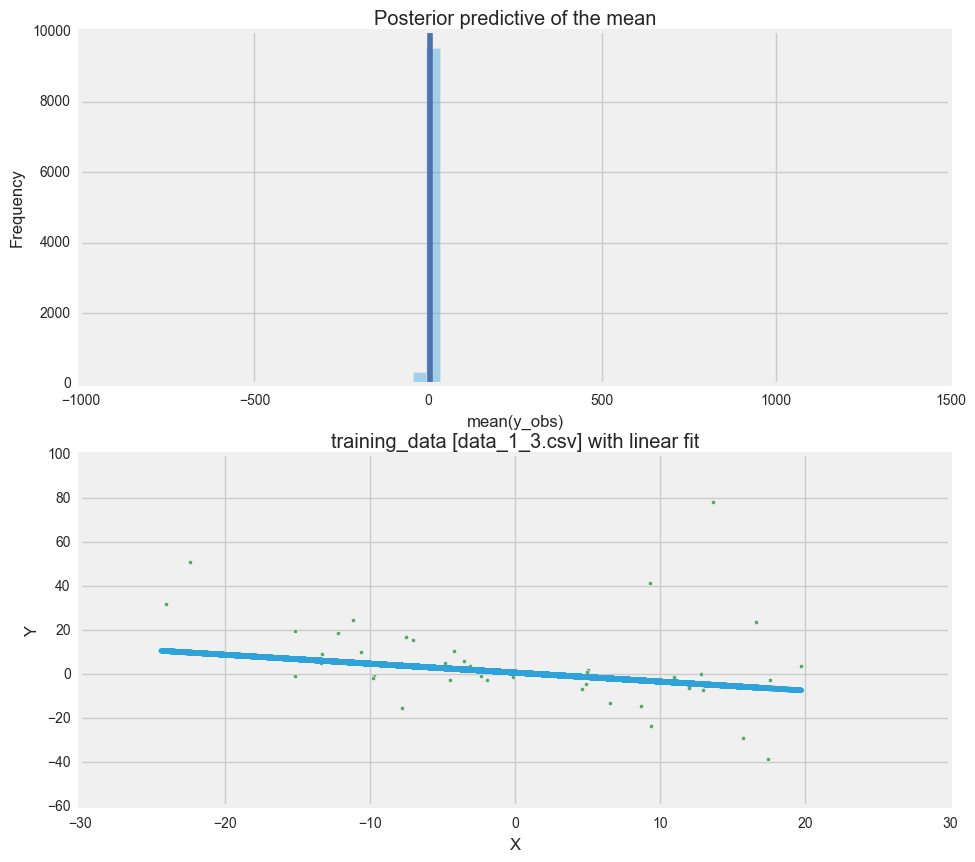

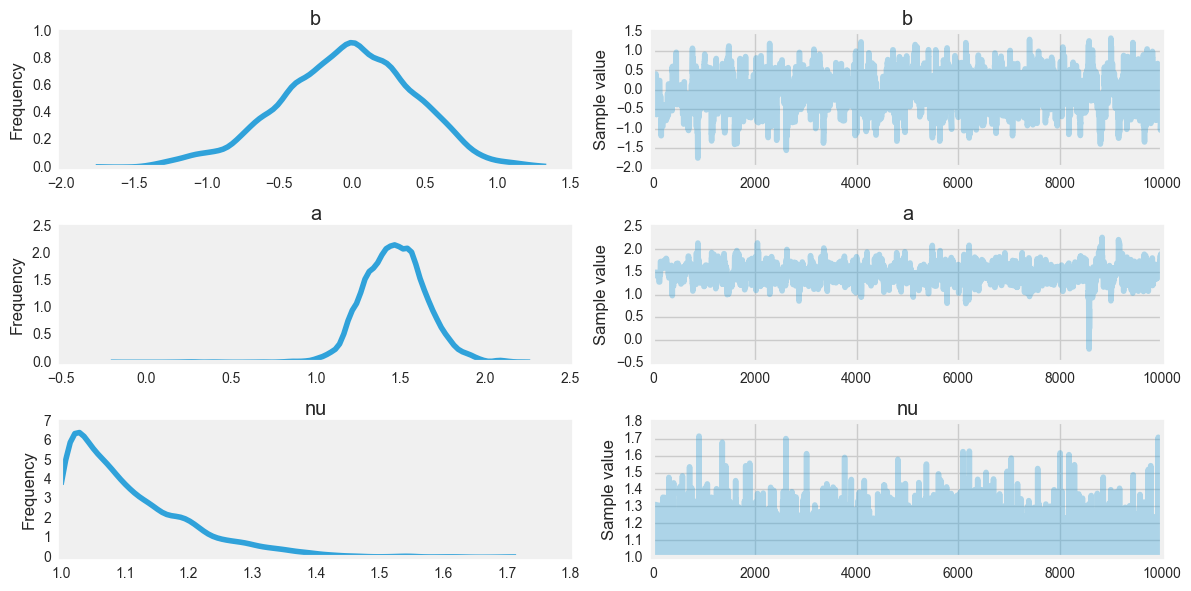

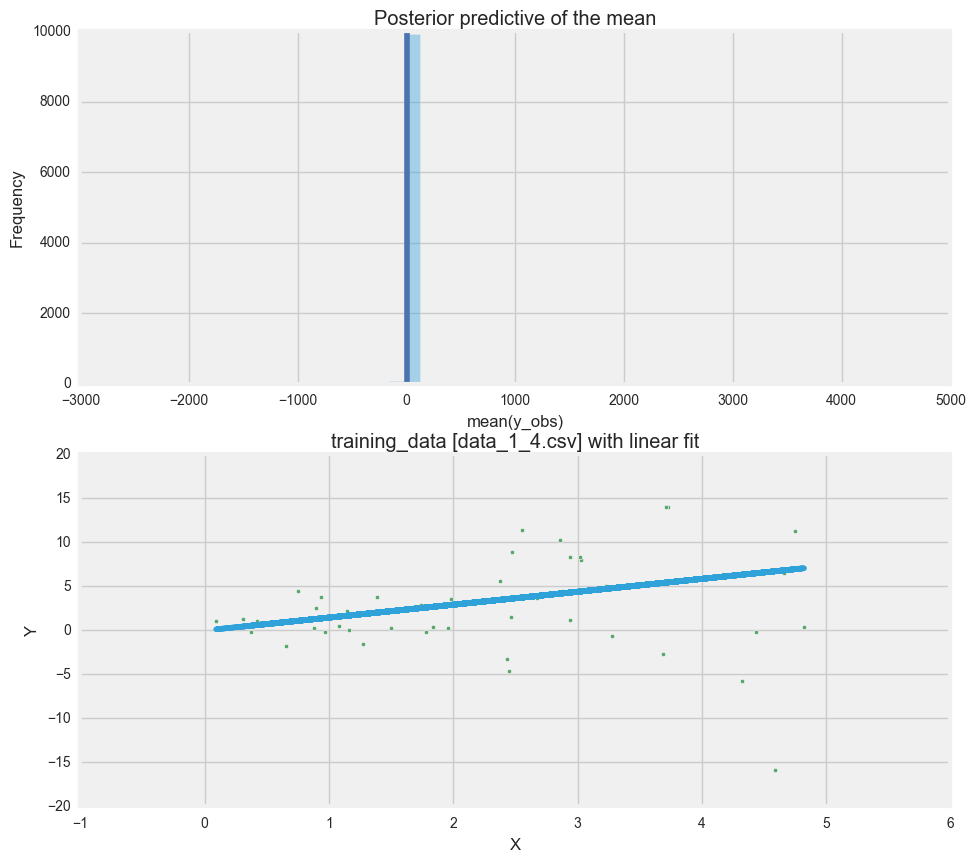

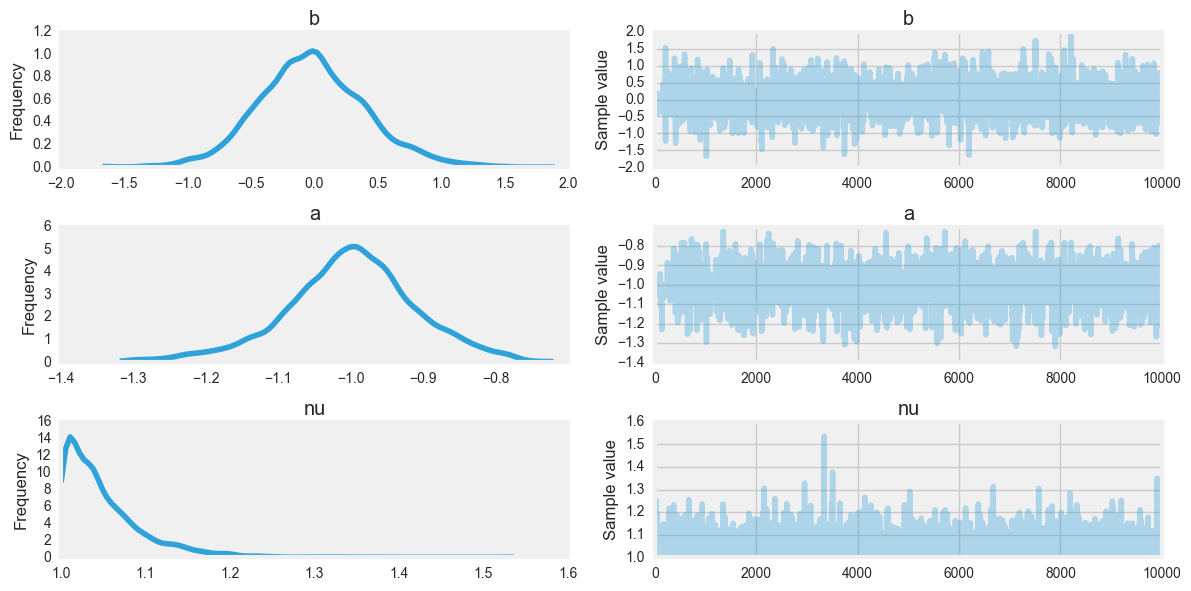

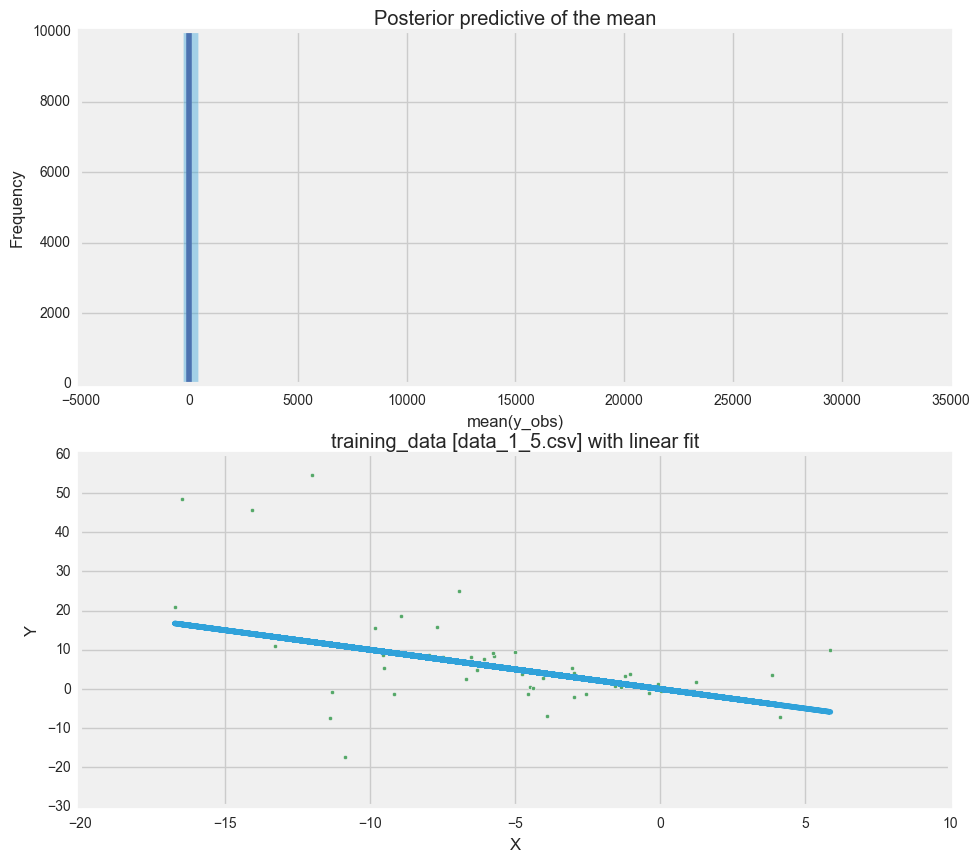

In [129]:
model = []
for file_name in files:
    x, y = CLRM.xy_op(file_name, None)
    m = CLRM.model(x, y, 'StudentT')
    trace = CLRM.mcmc(m, 10000)
    ppc = pm.sampling.sample_ppc(trace, model=m.model)
    model.append(CLRM(file_name, x, y, m, trace, ppc))
    CLRM.result_and_diagnostics(file_name, x, y, m, trace, ppc)

In [120]:
def ppc_test(model):
    
    data = []
    
    for m in model:        
        a_avg = np.mean([item['a'] for item in m.trace])
        b_avg = np.mean([item['b'] for item in m.trace])
        y_est = (a_avg*m.x.T)+(b_avg)
        e_avg_ppc = np.asarray(m.ppc['y_obs']-y_est).mean(axis=0)
        e_std_ppc = np.asarray(m.ppc['y_obs']-y_est).std(axis=0)

        e_obs = m.y - y_est
        
        for item in zip(e_obs, e_avg_ppc, m.x): 
            data.append({'obs': float(item[0]), 'ppc': float(item[1]), 'x': float(item[2])})
            
            
#         fig = plt.figure()
#         ax = fig.add_subplot(111)
#         ax.errorbar(x=m.x, 
#                  y=e_avg_ppc, 
#                  linestyle='', 
#                  marker='o')
#         ax.plot(m.x, e_obs, '*')
#         ax.set_xlabel('predictor')
#         ax.set_ylabel('outcome')
#         ax.set_xlim(1.10*min(m.x), 1.10*max(m.x))
#         ax.set_ylim(1.10*min(e_obs), 1.10*max(e_obs))
#         ax.set_title(m.file_name)
    
    return pd.DataFrame(data)

In [121]:
df = ppc_test(model)

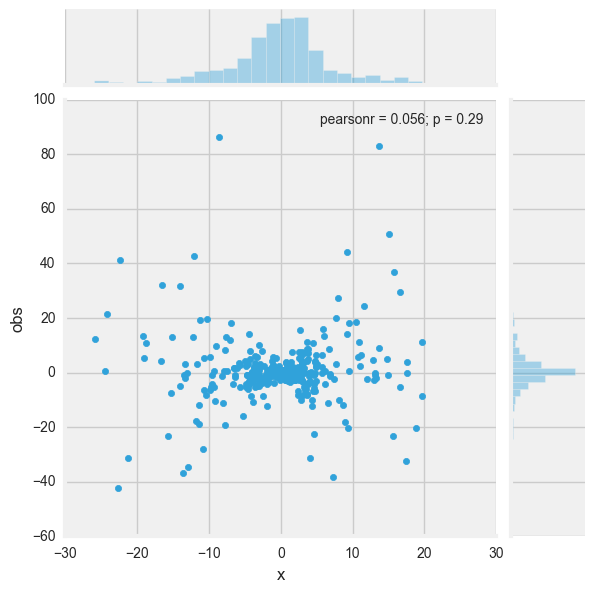

In [125]:
sns.jointplot(df['x'], df['obs'])

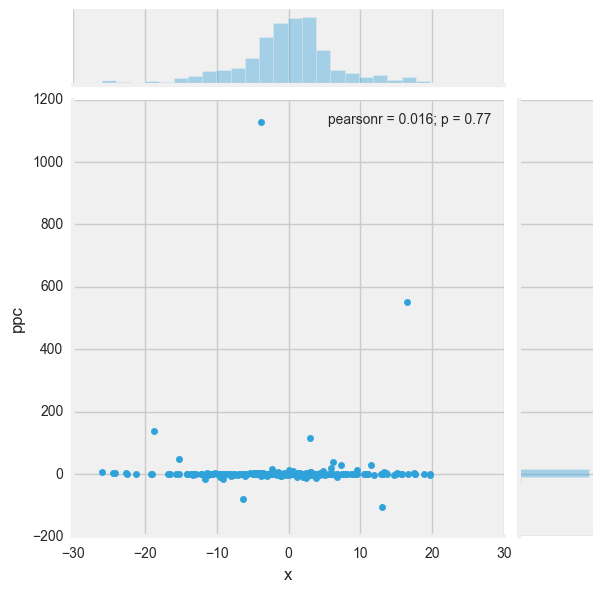

In [126]:
sns.jointplot(df['x'], df['ppc'])

In [73]:
ppc[0]

-0.29308894334580393

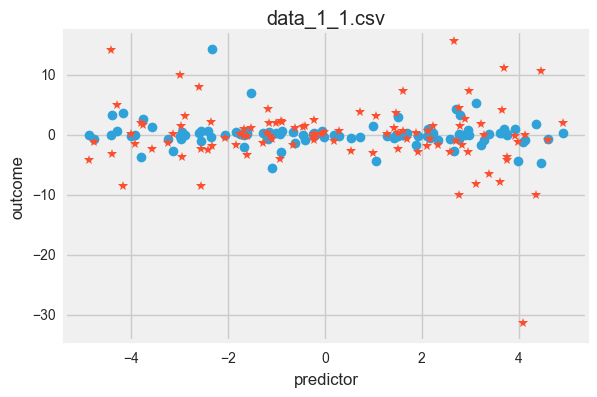

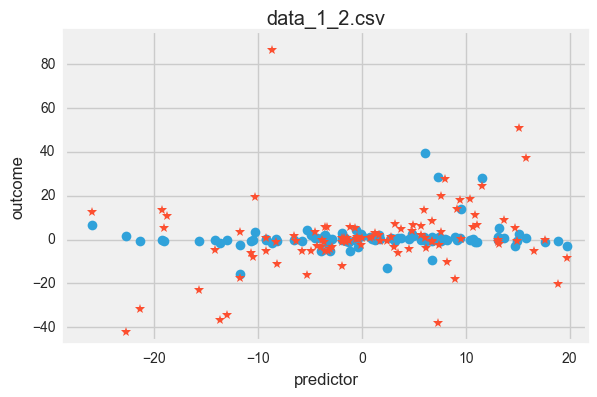

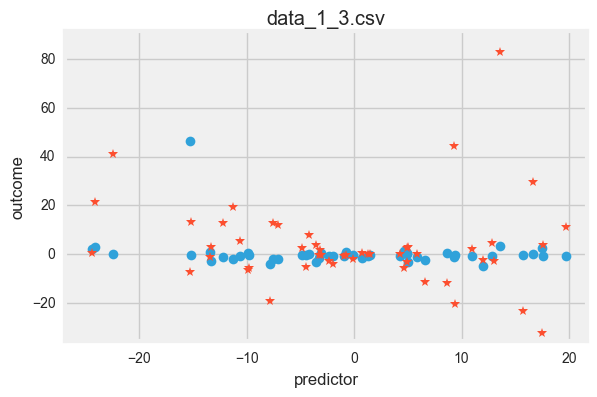

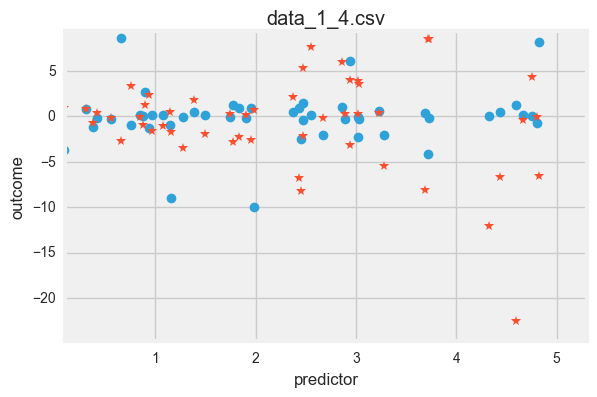

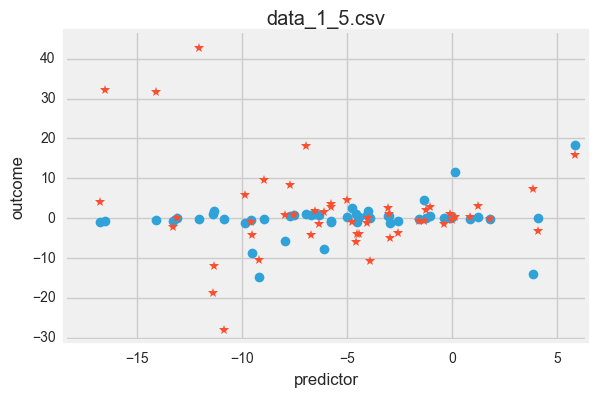

In [16]:
ppc_test(model)

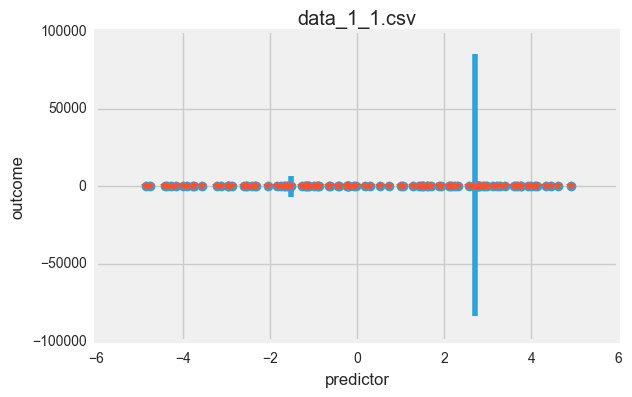

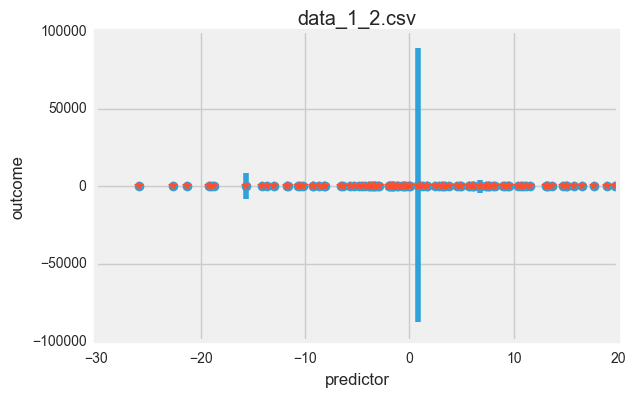

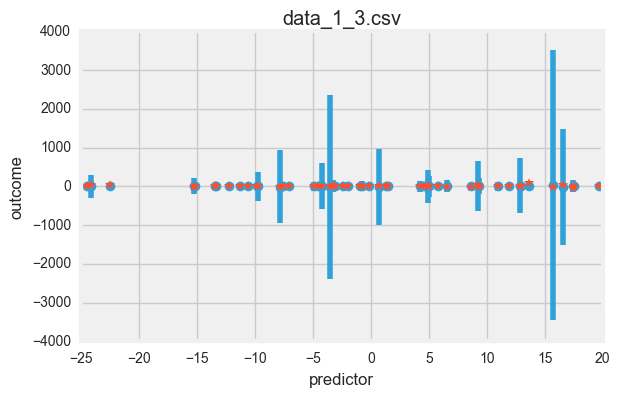

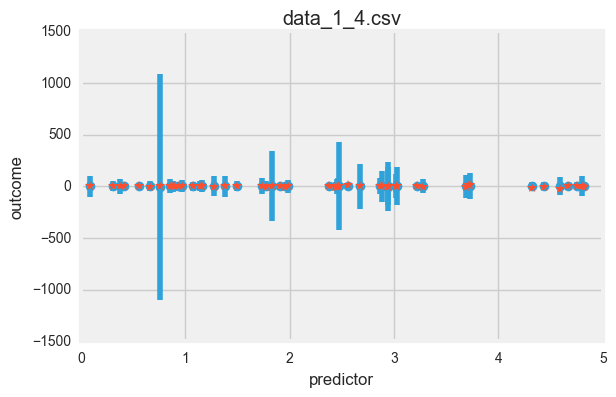

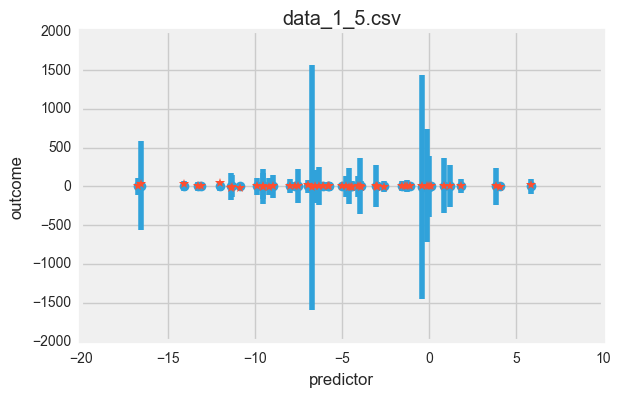

In [21]:
ppc_test(model)

data_1_1.csv
data_1_2.csv
data_1_3.csv
data_1_4.csv
data_1_5.csv


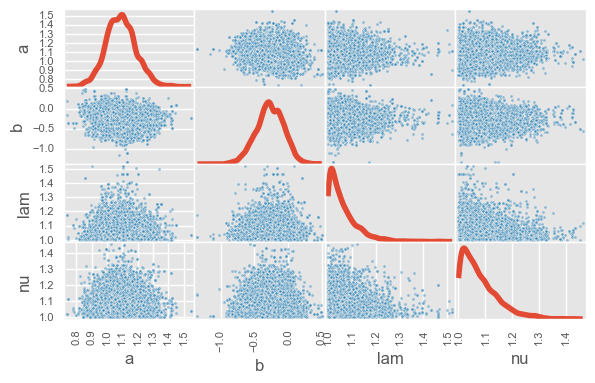

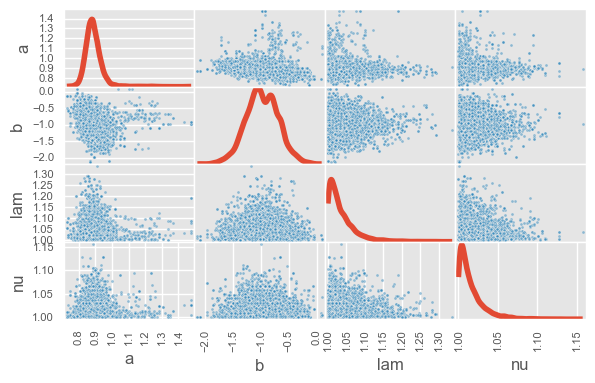

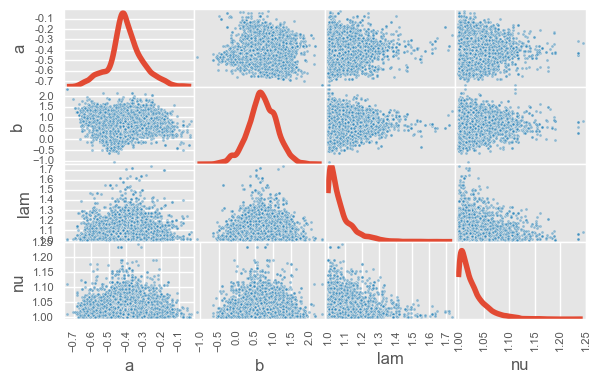

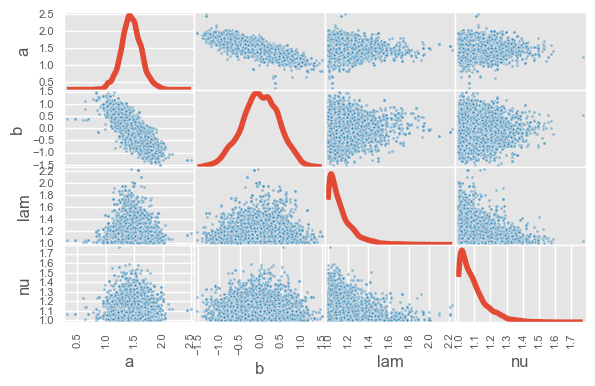

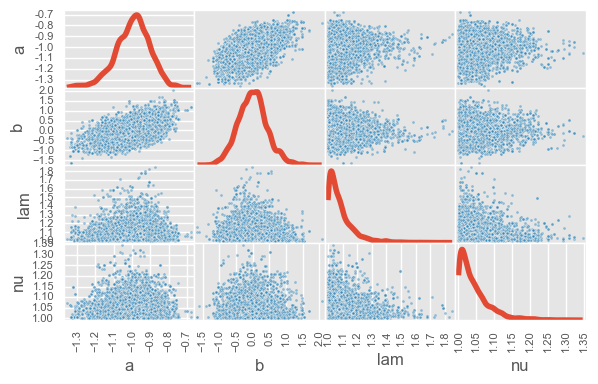

In [83]:
for m in model:
    trace = m.trace
    df_trace = pm.trace_to_dataframe(trace)
    print(m.file_name)
    pd.scatter_matrix(df_trace[-10000:], diagonal='kde')

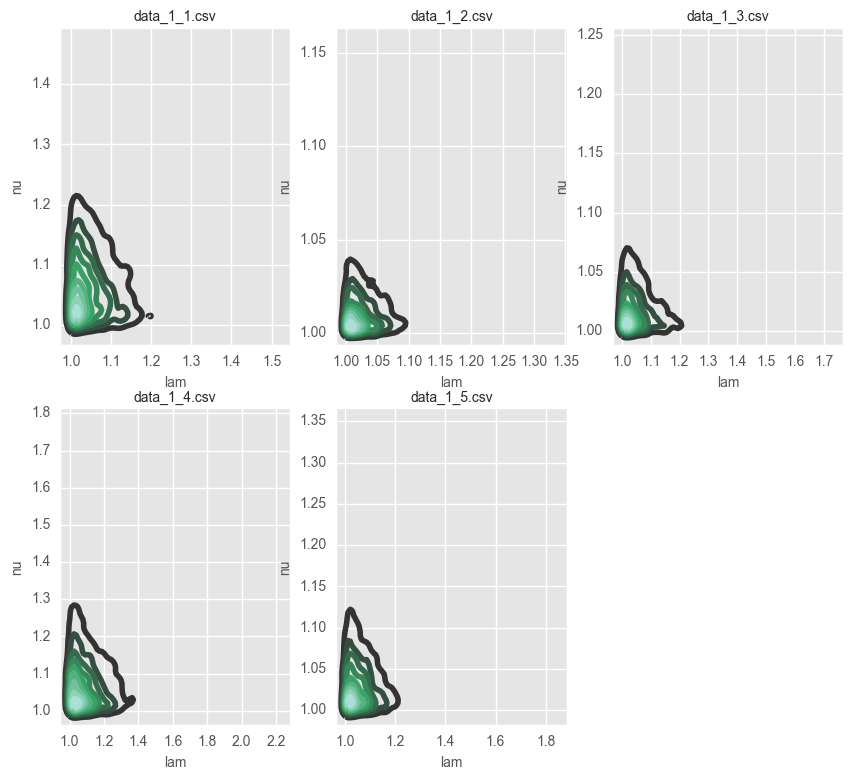

In [84]:
plt.style.use('ggplot')
axes = [231, 232, 233, 234, 235]
fig = plt.figure(figsize=(9, 9))
for e, m in enumerate(model):
    ax = fig.add_subplot(axes[e])
    trace = m.trace
    sns.kdeplot(trace['lam'], trace['nu'], ax=ax)
    ax.set_xlabel('lam', fontsize=10)
    ax.set_ylabel('nu', fontsize=10)
    ax.set_title(m.file_name, fontsize=10)

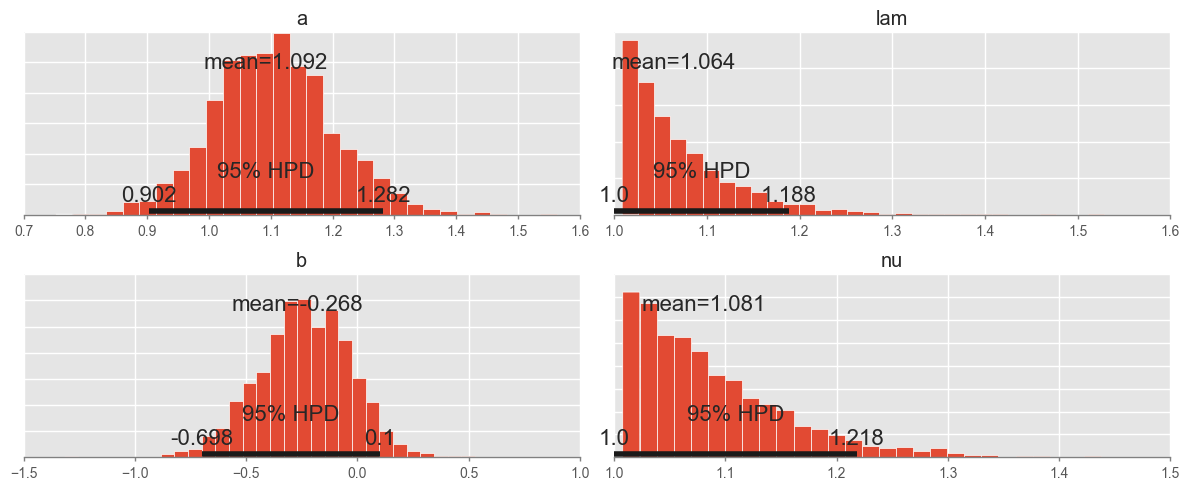

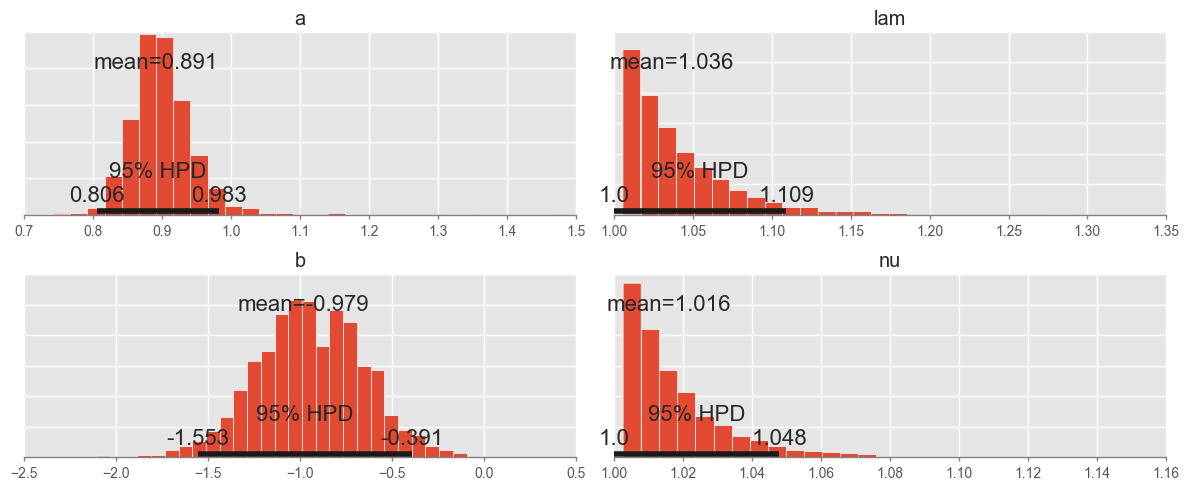

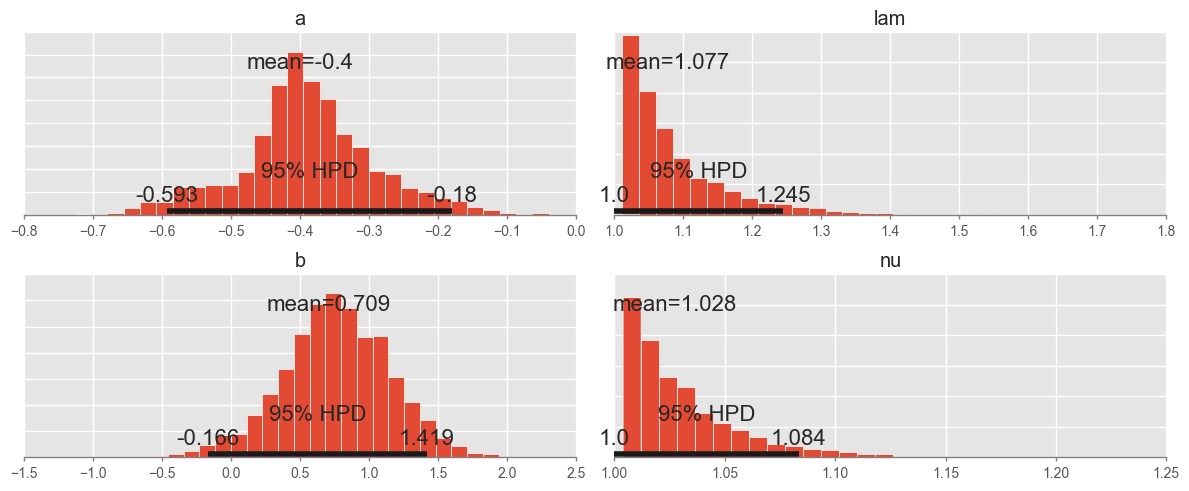

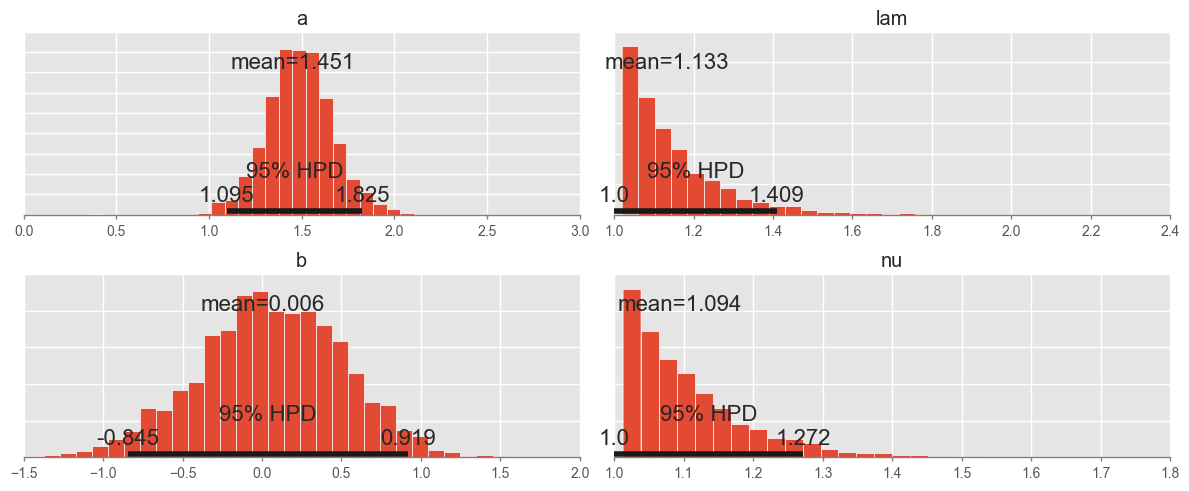

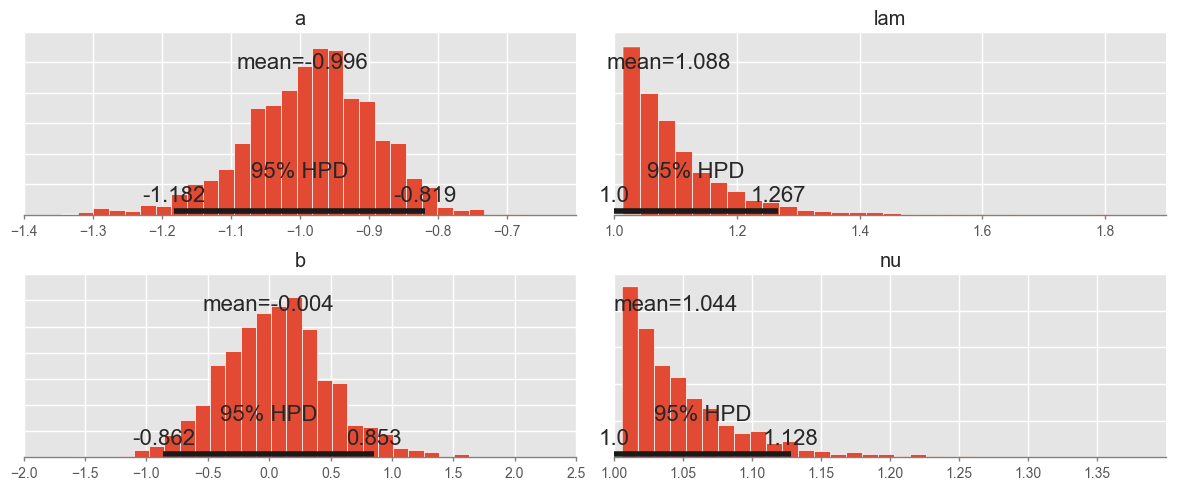

In [85]:
plt.style.use('ggplot')
for e, m in enumerate(model):
    trace = m.trace
    pm.plots.plot_posterior(trace, varnames=['a', 'b'])

In [ ]:
plt.style.use('ggplot')
for e, m in enumerate(model):
    trace = m.trace
    pm.plots.plot_posterior(trace, varnames=['lam', 'nu'])

In [126]:
x_values = {m.file_name: m.x for m in model}
y_values = {m.file_name: m.y for m in model}

def mean_in_trace(key, this_trace):
    return sum([t[key] for t in this_trace])/len(this_trace)
    
trace_values = {
    m.file_name: {
        'a': mean_in_trace('a', m.trace),
        'b': mean_in_trace('b', m.trace),
        'lam': mean_in_trace('lam', m.trace),
        'nu': mean_in_trace('nu', m.trace)
    }
    
   for m in model
 }

def plot_input_distribution():
    
    
    for file_name in files:
        
        fig = plt.figure(figsize=(15, 10))
        current_plot = 540
        
        current_plot += 1
        ax=fig.add_subplot(current_plot)
        sns.distplot(x_values[file_name], ax=ax, kde=False)
        ax.set_title("PDF(X)")
        
        b_mean = trace_values[file_name]['b']
        a_mean = trace_values[file_name]['a']
        y_est_values = (a_mean*x_values[file_name] + b_mean)
        current_plot += 1
        ax=fig.add_subplot(current_plot)
        ax.set_title("PDF(Y_EST)")
        sns.distplot(y_est_values, ax=ax)
        
        b_mean = trace_values[file_name]['b']
        a_mean = trace_values[file_name]['a']
        e_values = y_values[file_name] - (a_mean*x_values[file_name] + b_mean)
        current_plot += 1
        ax=fig.add_subplot(current_plot)
        ax.set_title("PDF(e_est)")
        sns.distplot(e_values, ax=ax)
        
        current_plot += 1
        ax = fig.add_subplot(current_plot)
        ax.axis('off')
        labels = ["a", "b", "lam", "nu"]        
        data =   [trace_values[file_name][label] for label in labels]
        text = '\n'.join(["{}={}".format(l, d) for l, d in zip(labels, data)])
        for l, d in zip(labels, data):
            ax.text(0.2, 0.2, text, fontsize=15)

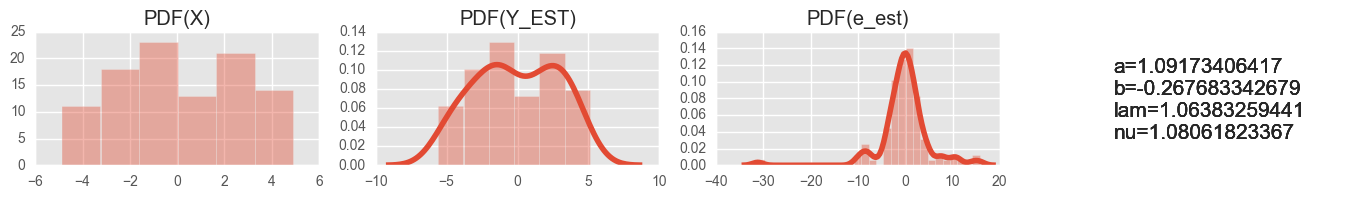

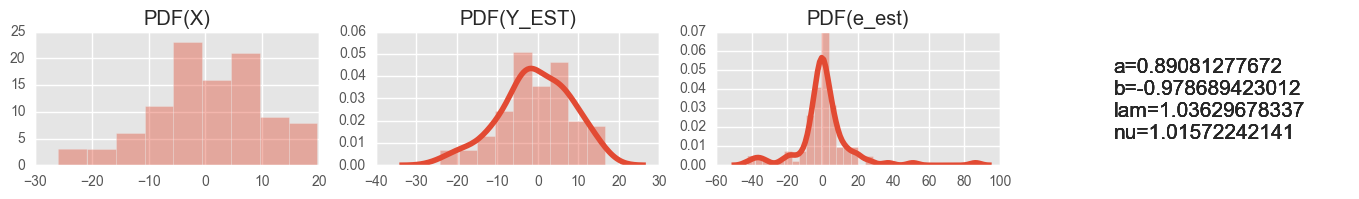

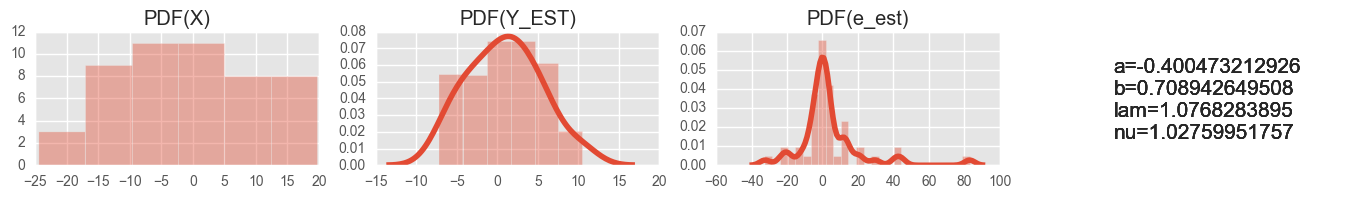

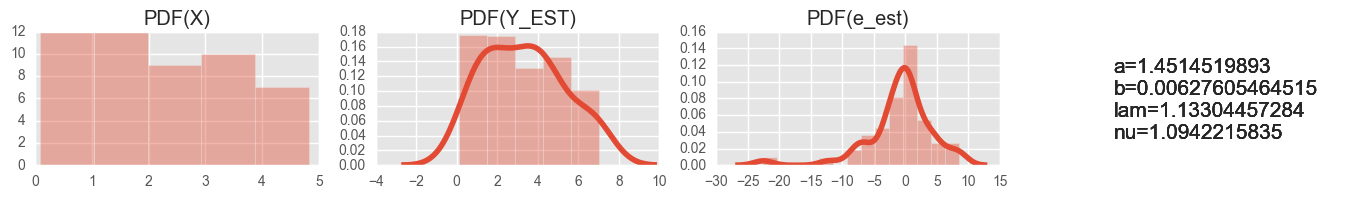

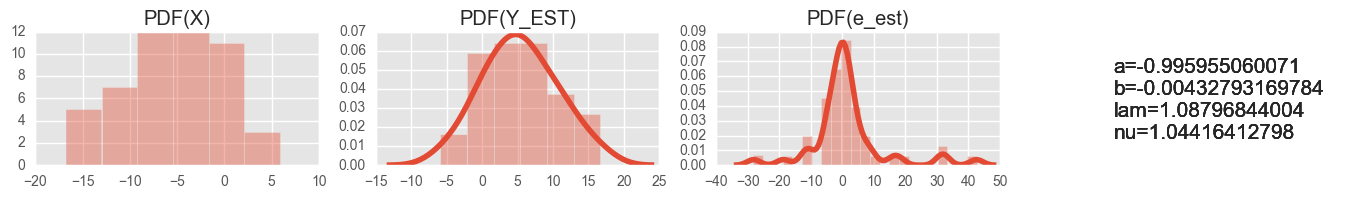

In [127]:
plot_input_distribution()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1136df2d0>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x1171a1c50>]], dtype=object)

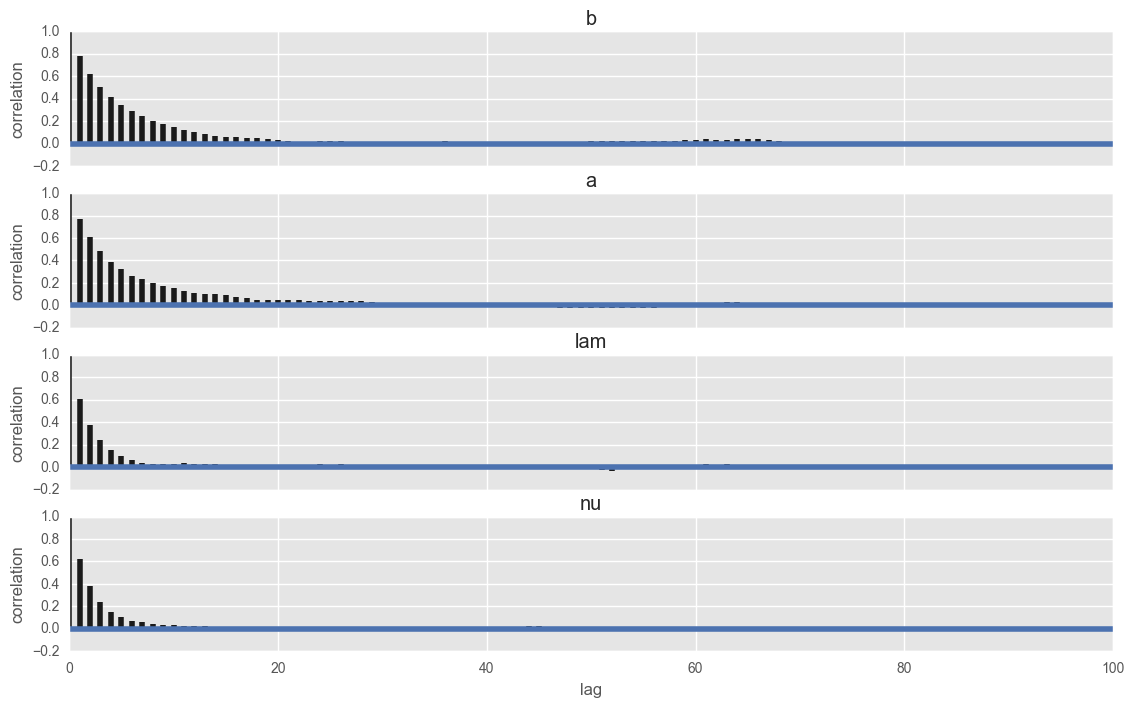

In [92]:
pm.autocorrplot(model[4].trace)